# **CODED PROJECT: MACHINE LEARNING - II (EASY VISA)**

# **Context**

Business communities in the United States are facing high demand for human resources, but one of the constant challenges is identifying and attracting the right talent, which is perhaps the most important element in remaining competitive. Companies in the United States look for hard-working, talented, and qualified individuals both locally as well as abroad.

The Immigration and Nationality Act (INA) of the US permits foreign workers to come to the United States to work on either a temporary or permanent basis. The act also protects US workers against adverse impacts on their wages or working conditions by ensuring US employers' compliance with statutory requirements when they hire foreign workers to fill workforce shortages. The immigration programs are administered by the Office of Foreign Labor Certification (OFLC).

OFLC processes job certification applications for employers seeking to bring foreign workers into the United States and grants certifications in those cases where employers can demonstrate that there are not sufficient US workers available to perform the work at wages that meet or exceed the wage paid for the occupation in the area of intended employment.

# **Objective**

In FY 2016, the OFLC processed 775,979 employer applications for 1,699,957 positions for temporary and permanent labor certifications. This was a nine percent increase in the overall number of processed applications from the previous year. The process of reviewing every case is becoming a tedious task as the number of applicants is increasing every year.

The increasing number of applicants every year calls for a Machine Learning based solution that can help in shortlisting the candidates having a higher chance of VISA approval. OFLC has hired the firm EasyVisa for data-driven solutions. You, as a data scientist at EasyVisa, have to analyze the data provided and, with the help of a classification model:

1. Facilitate the process of visa approvals.
2. Recommend a suitable profile for the applicants for whom the visa should be certified or denied based on the drivers that significantly influence the case status.

# **Data Description**

The data contains the different attributes of the employee and the employer. The detailed data dictionary is given below.

* **case_id:** ID of each visa application
* **continent:** Information of continent the employee
* **education_of_employee:** Information of education of the employee
* **has_job_experience:** Does the employee have any job experience? Y= Yes; N = No
* **requires_job_training:** Does the employee require any job training? Y = Yes; N = No
* **no_of_employees:** Number of employees in the employer's company
* **yr_of_estab:** Year in which the employer's company was established
* **region_of_employment:** Information of foreign worker's intended region of employment in the US.
* **prevailing_wage:** Average wage paid to similarly employed workers in a specific occupation in the area of intended employment. The purpose of the prevailing wage is to ensure that the foreign worker is not underpaid compared to other workers offering the same or similar service in the same area of employment.
* **unit_of_wage:** Unit of prevailing wage. Values include Hourly, Weekly, Monthly, and Yearly.
* **full_time_position:** Is the position of work full-time? Y = Full-Time Position; N = Part-Time Position
* **case_status:** Flag indicating if the Visa was certified or denied

# **Importing the necessary libraries**

In [1]:
!pip install numpy==1.26.4 pandas==2.2.2 matplotlib==3.10.0 seaborn==0.13.2 scikit-learn==1.6.1 -q

In [3]:
!pip install imblearn --user
!pip install imbalanced-learn --user

In [5]:
!pip install xgboost

In [7]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# To suppress scientific notations
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# Libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# To tune model, get different metric scores, and split data
from sklearn import metrics
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
)
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score

# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

# To impute missing values
from sklearn.impute import SimpleImputer

# To oversample and undersample data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# To do hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV

# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)

# To supress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To help with model building
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
)
from xgboost import XGBClassifier

# To supress warnings
import warnings
warnings.filterwarnings("ignore")

## **Loading the data**

In [45]:
# Read the data
EV=pd.read_csv("EasyVisa.csv")

### Creating a copy of the data 

In [48]:
df_original = EV.copy()

## **Data Overview**

The initial steps to get an overview of any dataset is to:
* Observe the first few rows of the dataset, to check whether the dataset has been loaded properly or not
* Get information about the number of rows and columns in the dataset
* Find out the data types of the columns to ensure that data is stored in the preferred format and the value of each property is as expected.
* Check the statistical summary of the dataset to get an overview of the numerical columns of the data

### Displaying the first few rows and last few rows of the dataset

In [52]:
df_original.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.203,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.650,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.860,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.030,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.390,Year,Y,Certified


In [54]:
df_original.tail()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.570,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.790,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.850,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.770,Year,Y,Certified
25479,EZYV25480,Asia,Bachelor's,Y,N,3195,1960,Midwest,70876.910,Year,Y,Certified


### Checking the shape of the dataset

In [57]:
df_original.shape
print('There are',df_original.shape[0],'rows, and', df_original.shape[1], 'columns')

There are 25480 rows, and 12 columns


### Checking the data types of the columns for the dataset

In [60]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


**Observations**

* The dataset consists of 3 numerical columns and 9 object type columns.
* The `no_of_employees` , `yr_of_estab` and `prevailing_wage` are the numerical columns of the dataset. 
* The `case_id`,`continent`, `education_of_employee`,  `has_job_experience`, `requires_job_training`, `region_of_employment`, `unit_of_wage`, `full_time_position` and `case_status ` are the object type columns in the dataset. 
* The columns in the dataset are in the preferred format as per the respective values
* From the information obtained it is observed that there is no missing values in the dataset.

### Checking for missing values

In [64]:
df_original.isnull().sum()

case_id                  0
continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64

### Checking for duplicate values

In [67]:
df_original.duplicated().sum()

0

* 	It is also observed that there are no duplicate entries in the dataset and also there is no missing values in the dataset

### Statistical summary of the numerical columns of the dataset

In [71]:
df_original.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_employees,25480.000,5667.043,22877.929,-26.000,1022.000,2109.000,3504.000,602069.000
yr_of_estab,25480.000,1979.410,42.367,1800.000,1976.000,1997.000,2005.000,2016.000
prevailing_wage,25480.000,74455.815,52815.942,2.137,34015.480,70308.210,107735.513,319210.270


**Observations**

* From the statistical summary of the numerical columns, it can be seen that some employers have as much as `602,069 employees` working in their firm.
* It is to be noted that the minimum no. of employees is `-26`and this clearly shows that it is an error, as the no. of employees cannot be of negative value.
* The average no. of employees (mean) is much larger than its median (50%) value, indicating a longer right tailed (positively skewed) distribution. It can also be seen that there is presence of outliers in this column
* The mean year of establishment is 1979, while the median is 1997 which indicates that the distribution of `yr_of_estab` is left skewed. It is noted that the minimum value is 1800 and the maximum value is 2016, showing that the dataset has details about firms established between 1800 to 2016, where 1800 being the oldest firm in the dataset.
* The prevailing wage ranges from a minimum value of USD 2.137 to a maximum of USD 319,210.270, which shows there is a huge gap inbetween and the reason can be analysed further.
* The mean `prevailing_wage` is USD 74,455.815 which is higher that its median, which is USD 70,308.210, indicating a positively skewed distribution.

### Checking the number of distinct values in the dataset

In [75]:
df_original.nunique() # Checking the number of distinct values in each of the columns in the data set

case_id                  25480
continent                    6
education_of_employee        4
has_job_experience           2
requires_job_training        2
no_of_employees           7105
yr_of_estab                199
region_of_employment         5
prevailing_wage          25454
unit_of_wage                 4
full_time_position           2
case_status                  2
dtype: int64

**Observations**

* It is noted that the column `case_id` has `25480` unique values and this column does not play any significant role in analysis, hence can be removed

### Statistical summary of the categorical/object columns of the dataset

In [79]:
df_original.describe(include=["object"]).T

,count,unique,top,freq
case_id,25480,25480,EZYV01,1
continent,25480,6,Asia,16861
education_of_employee,25480,4,Bachelor's,10234
has_job_experience,25480,2,Y,14802
requires_job_training,25480,2,N,22525
region_of_employment,25480,5,Northeast,7195
unit_of_wage,25480,4,Year,22962
full_time_position,25480,2,Y,22773
case_status,25480,2,Certified,17018


### Checking for anomalous values in categorical/object variables

In [82]:
# Making a list of all catrgorical variables
cat_col = list(df_original.select_dtypes("object").columns)

# Printing number of count of each unique value in each column
for column in cat_col:
    print(df_original[column].value_counts())
    print("-" * 50)

case_id
EZYV01       1
EZYV16995    1
EZYV16993    1
EZYV16992    1
EZYV16991    1
            ..
EZYV8492     1
EZYV8491     1
EZYV8490     1
EZYV8489     1
EZYV25480    1
Name: count, Length: 25480, dtype: int64
--------------------------------------------------
continent
Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: count, dtype: int64
--------------------------------------------------
education_of_employee
Bachelor's     10234
Master's        9634
High School     3420
Doctorate       2192
Name: count, dtype: int64
--------------------------------------------------
has_job_experience
Y    14802
N    10678
Name: count, dtype: int64
--------------------------------------------------
requires_job_training
N    22525
Y     2955
Name: count, dtype: int64
--------------------------------------------------
region_of_employment
Northeast    7195
South        7017
West         6586
Midwest      

**Observations**

* **continent:** The dataset shows that there are applicants from `6 continents` throughout the globe, of which `16861` visa applications are from Asia.
  
* **education_of_employee:** The education level of the applicants were mentioned in `4 levels`, of which most of the applicants nearly `10234` have completed their Bachelor's degree
  
* **has_job_experience:** A high number of applicants say `14802` were seen to have a previous job experience and almost `10678` applications were from freshers.
 
* **requires_job_training:** A mojory of the applicants say `22525` for visa application did not require `job_training`
  
* **region_of_employment:** There are `5 different region` where the applicants were employed, of which fewer applications (`375`) were from applicants employed in an`Island`
  
* **unit_of_wage:** The `unit of wage` of the employees is categorized under `4 divisions`, `Year`, `Hour`,`Week`, and `Month`. This is the reason behind the huge variation in `Mean`,`Median`,`Minimum` and `Maximum` values in this column.
 
* **full_time_position:** It is also seen that most of the applicants were from applicants (`22773`) who were employed in full_time
  
* **case_status:** The `case_status` is the `target` of this analysis, and it can be seen that most of the applications were `Certified` with visa approval and the `Denied` count is less.

## **Feature Engineering**

* **The column `case_id` has `25480` unique values and this column does not play any significant role in analysis, hence can be removed**
* **Encoding `Denied` and `Certified` applicants to `0` and `1` respectively, for analysis**

#### **Dropping of the column `case_id`**

In [88]:
df_original=df_original.drop(["case_id"], axis=1)
df_original.head()

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,Asia,High School,N,N,14513,2007,West,592.203,Hour,Y,Denied
1,Asia,Master's,Y,N,2412,2002,Northeast,83425.650,Year,Y,Certified
2,Asia,Bachelor's,N,Y,44444,2008,West,122996.860,Year,Y,Denied
3,Asia,Bachelor's,N,N,98,1897,West,83434.030,Year,Y,Denied
4,Africa,Master's,Y,N,1082,2005,South,149907.390,Year,Y,Certified


#### **Encoding `Denied` and `Certified` "case_status" to `0` and `1` respectively, for analysis**

In [91]:
df_original["case_status"].replace("Denied", 0, inplace=True)
df_original["case_status"].replace("Certified", 1, inplace=True)
df_original.head()

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,Asia,High School,N,N,14513,2007,West,592.203,Hour,Y,0
1,Asia,Master's,Y,N,2412,2002,Northeast,83425.650,Year,Y,1
2,Asia,Bachelor's,N,Y,44444,2008,West,122996.860,Year,Y,0
3,Asia,Bachelor's,N,N,98,1897,West,83434.030,Year,Y,0
4,Africa,Master's,Y,N,1082,2005,South,149907.390,Year,Y,1


## **Exploratory Data Analysis**

## **Univariate Analysis**

#### The below functions need to be defined to carry out the Exploratory Data Analysis.

### **Histogram, Boxplots, Labeled Barplots and Stacked Barplots for numerical and object columns**

In [97]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [99]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [101]:
# function to plot stacked bar chart

def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [103]:
### Function to plot distributions

def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

## **Numerical Columns**

### **no_of_employees**	

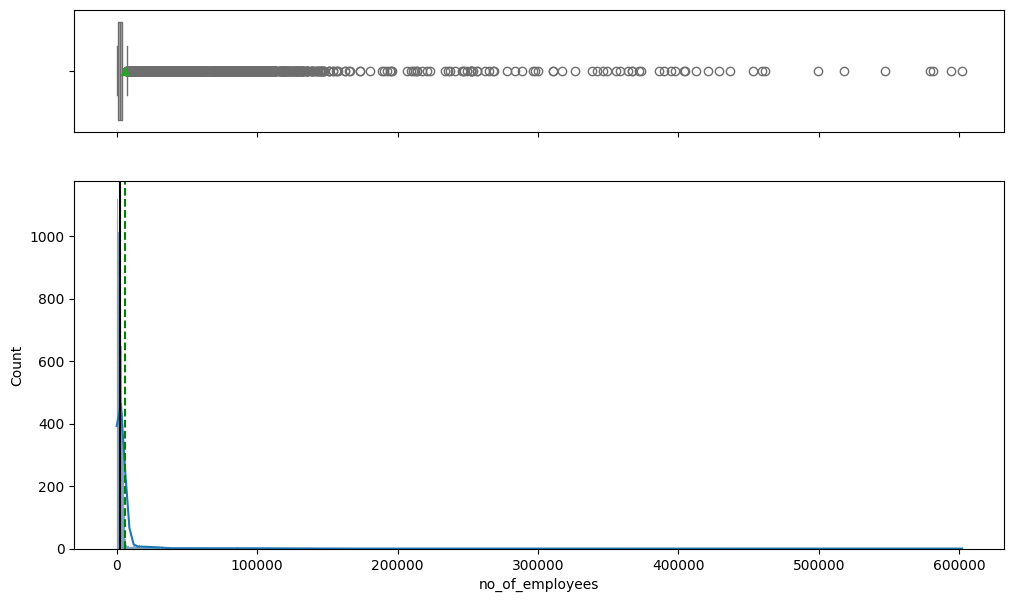

In [71]:
histogram_boxplot(df_original, "no_of_employees", kde=True)

**Observations**

* Here, it is seen that the distribution is right skewed and has a large number of outliers.
* From the data description we see that the applications are from applicants who are employed in various firms, which were established from 1800 to 2016.
* So,there is a possibility of having more number of employees by the firms which were established long before than the companies that were established recently. 


### **yr_of_estab**	

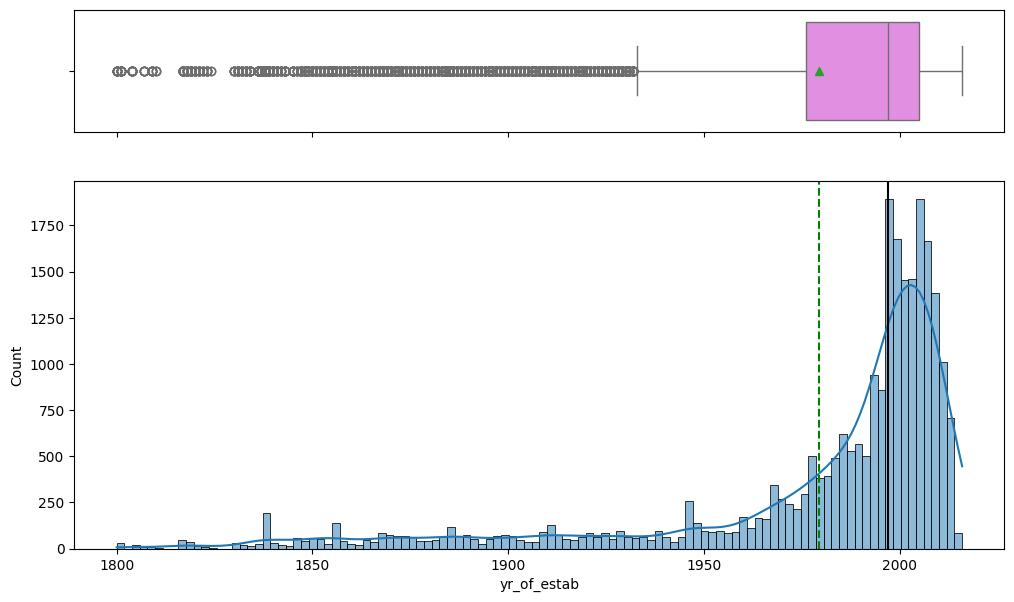

In [75]:
histogram_boxplot(df_original, "yr_of_estab", kde=True)

**Observations**

* Here, it is seen that the distribution is left skewed and has a large number of outliers.
* The mean year of establishment is 1979, while the median is 1997 which indicates that the distribution of yr_of_estab is left skewed. It is noted that the minimum value is 1800 and the maximum value is 2016, showing that the dataset has details about firms established between 1800 to 2016, where 1800 being the oldest firm in the dataset.
* It is observed that there are high number of applications from applicants who are employed in companies established by 2000 and later.
  

### **prevailing_wage**

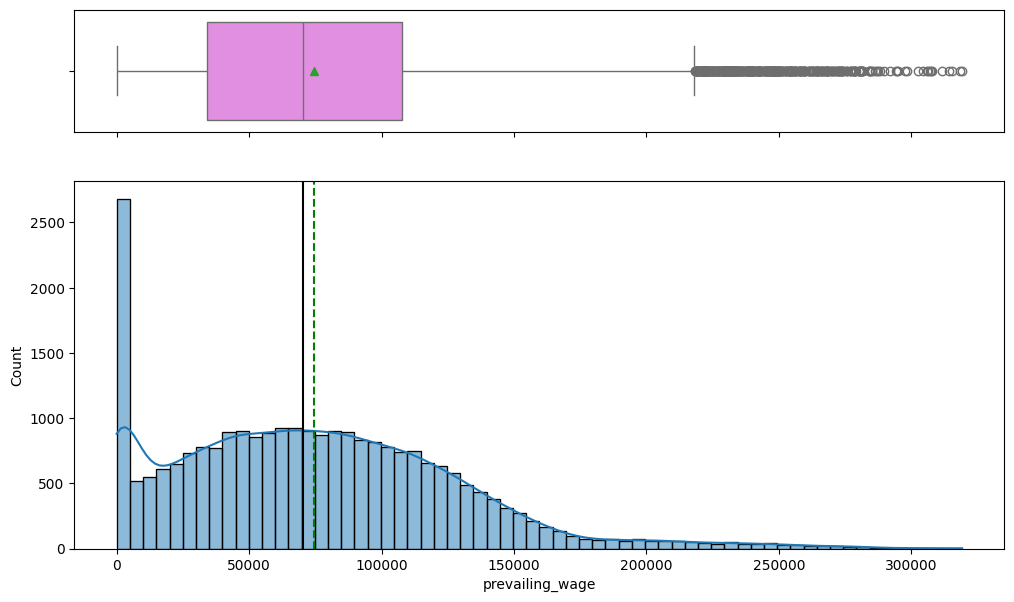

In [79]:
histogram_boxplot(df_original, "prevailing_wage", kde=True)

**Observations**

* The distribution is right skewed with the mean slightly larger than the median
* To understand the variation on values in this distribution, it is essential to focus on `unit_of_wage`. It is also seen that it is under `4 categories` such as `Year`, `Hour`,`Week`, and `Month`. Hence data falling above larger right tail cannot be considered as outliers

### Distribution of variables in the data

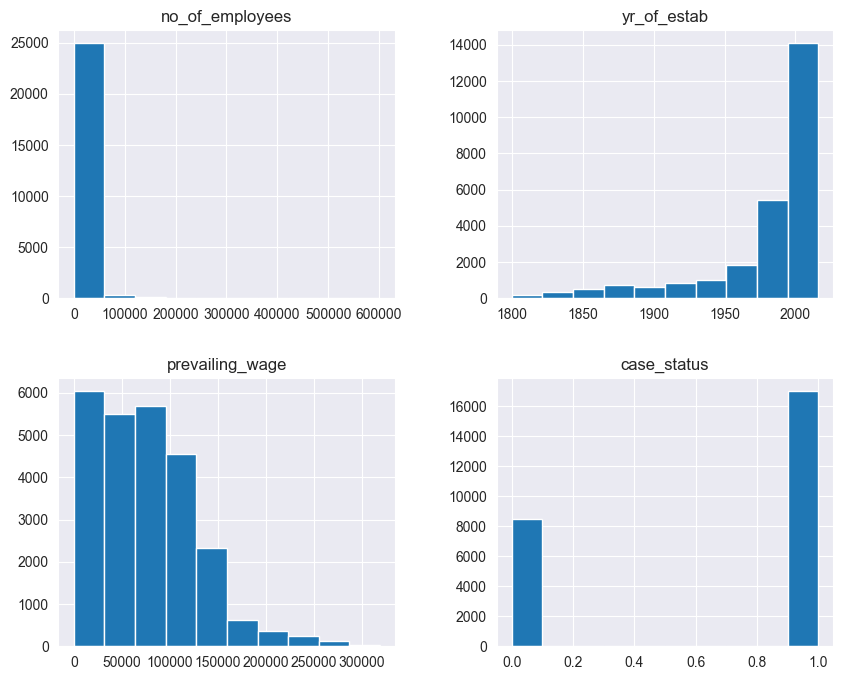

In [83]:
sns.set_style("darkgrid")
df_original.hist(figsize=(10, 8))
plt.show()

**Observations:**
* The employer's company profile of the visa applicants is shown such that majority of the companies have less than 1 lakh employees working in their firms.
* The firms in this dataset have been established from 1800 to above 2000.
* There is a high dense of applications with their prevailing wage less than 1 lakh USD
* We see that the certified visas outnumbers the denials

## **Categorical/ object Columns**

### **continent**

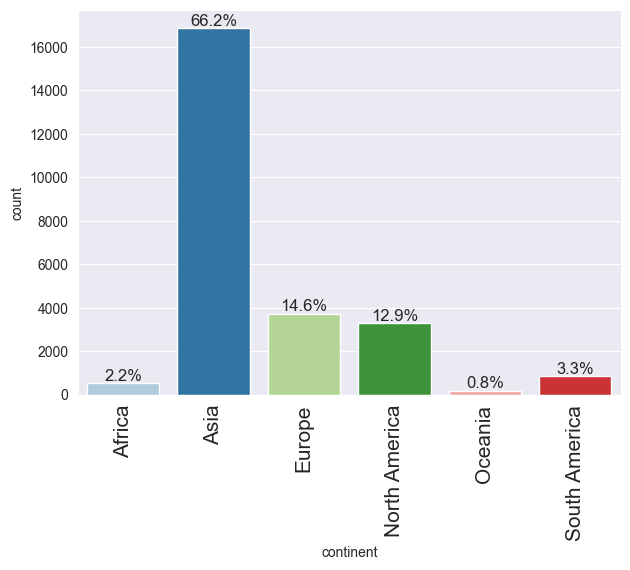

In [88]:
labeled_barplot(df_original,"continent",perc=True)

In [90]:
df_original['continent'].value_counts()

continent
Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: count, dtype: int64

**Observations** 
 * Most of the employees belong to Asian continent
 * Very less no. of applicats ($\approx $0.8%) are from Oceania 

### **education_of_employee**

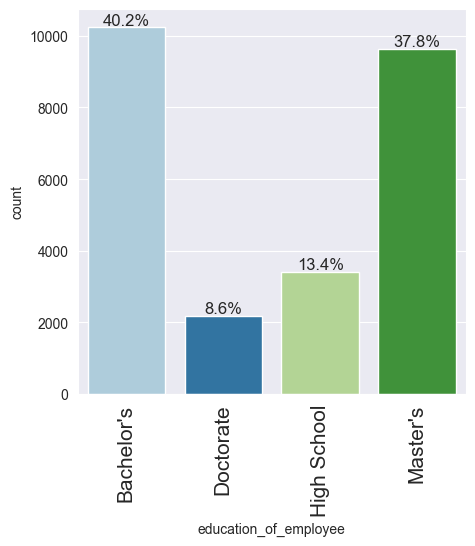

In [94]:
labeled_barplot(df_original,"education_of_employee",perc=True)

In [96]:
df_original['education_of_employee'].value_counts()

education_of_employee
Bachelor's     10234
Master's        9634
High School     3420
Doctorate       2192
Name: count, dtype: int64

**Observations** 

* Most of the employees have completed bachelors degree, the percentage of employees who have a masters degree is slightly lower than the bachelor's
* Very few employees have doctorate degrees

### **has_job_experience**

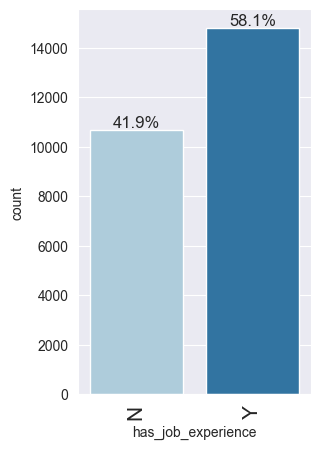

In [100]:
labeled_barplot(df_original,"has_job_experience",perc=True)

In [102]:
df_original['has_job_experience'].value_counts()

has_job_experience
Y    14802
N    10678
Name: count, dtype: int64

**Observations**

* Nearly 58.1% of visa applications have a previous job experience while 41.9% were without an experience.

### **requires_job_training**

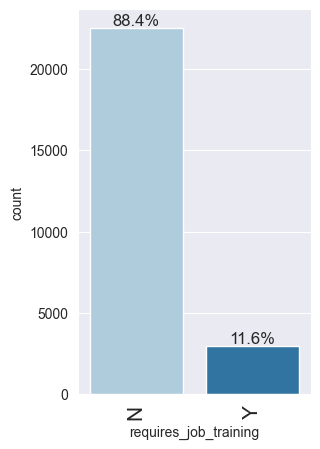

In [106]:
labeled_barplot(df_original,"requires_job_training",perc=True)

In [108]:
df_original['requires_job_training'].value_counts()

requires_job_training
N    22525
Y     2955
Name: count, dtype: int64

**Observations**

* Almost 88.4% of the visa applicants do not require a job_training while a least percentage of about 11.6% require training for their profession.

### **region_of_employment**

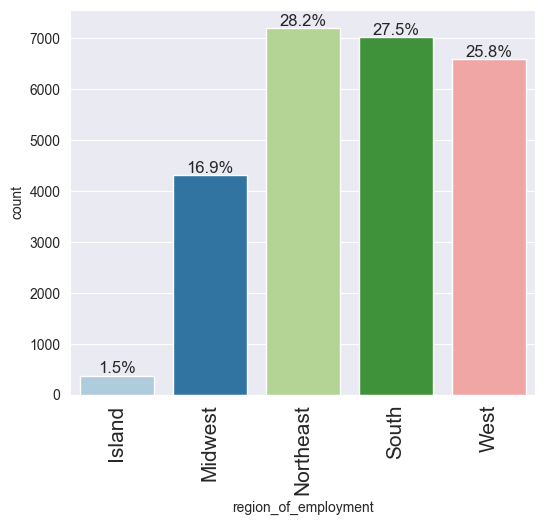

In [112]:
labeled_barplot(df_original,"region_of_employment",perc=True)

In [114]:
df_original['region_of_employment'].value_counts()

region_of_employment
Northeast    7195
South        7017
West         6586
Midwest      4307
Island        375
Name: count, dtype: int64

**Observations**

* There are only 1.5% of visa applications from employees placed in the island region being the the lowest.
* The visa applications from employees working in the Northeast region tops with 28.2% followed by South and West regions

### **unit_of_wage**

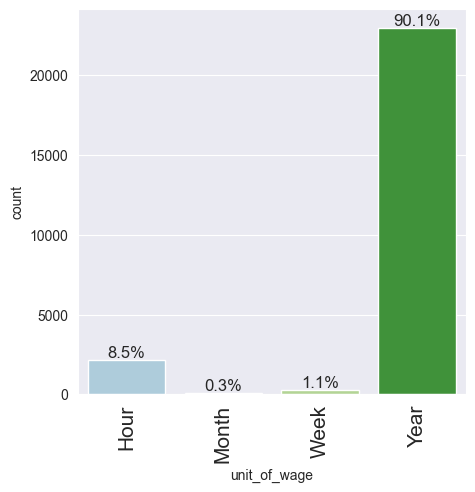

In [118]:
labeled_barplot(df_original,"unit_of_wage",perc=True)

In [120]:
df_original['unit_of_wage'].value_counts()

unit_of_wage
Year     22962
Hour      2157
Week       272
Month       89
Name: count, dtype: int64

**Observations**
* The most used unit of wage is the `Year` unit, and this explains the right skewed distribution of the prevailing wage distribution.
* Only 8.5% of the prevailing_wage is mentioned with `Hour` units, where the `Month` and `Week` units are minimally mentioned

### **full_time_position**

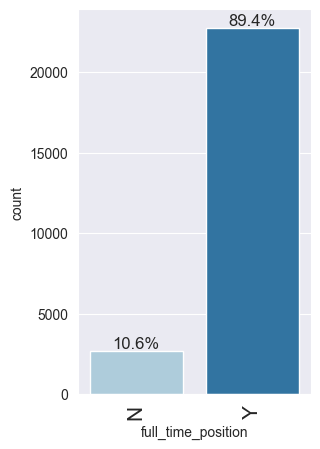

In [124]:
labeled_barplot(df_original,"full_time_position",perc=True)

In [126]:
df_original['full_time_position'].value_counts()

full_time_position
Y    22773
N     2707
Name: count, dtype: int64

**Observations**

* The employees who are working in `full_time_position` are the major ones to apply for visa, whereas part_time employees are the least (~10.6%)

### **case_status**

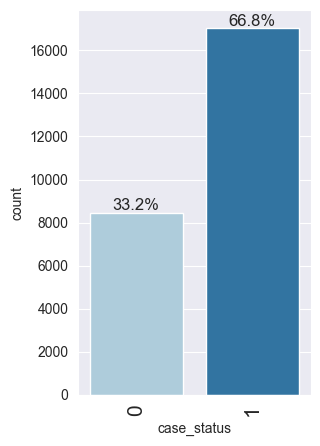

In [130]:
labeled_barplot(df_original,"case_status",perc=True)

In [132]:
df_original['case_status'].value_counts()

case_status
1    17018
0     8462
Name: count, dtype: int64

**Observations**

* The majority of the applicants ($\approx $66.8%) were `Certified` with visa
* While less no. of applicants ($\approx $33.2%) were `Denied`.

## **Bivariate Analysis**

#### **Let's see the attributes that have a strong correlation with each other**

#### **Correlation Check**

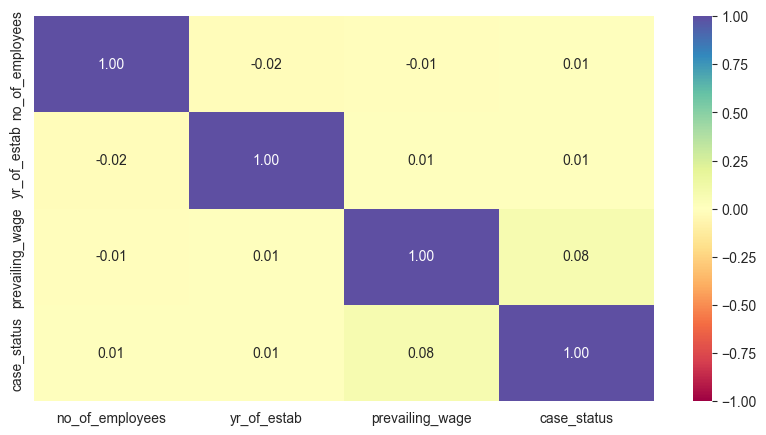

In [138]:
cols_list = df_original.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(10, 5))
sns.heatmap(
    df_original[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

**Observations**

* It is understood that there is no much correlation between the numerical columns of the dataset.

## **Relationship between categorical variables vs target variable-case_status**

### **continent vs case_status**

case_status       0      1    All
continent                        
All            8462  17018  25480
Asia           5849  11012  16861
North America  1255   2037   3292
Europe          775   2957   3732
South America   359    493    852
Africa          154    397    551
Oceania          70    122    192
------------------------------------------------------------------------------------------------------------------------


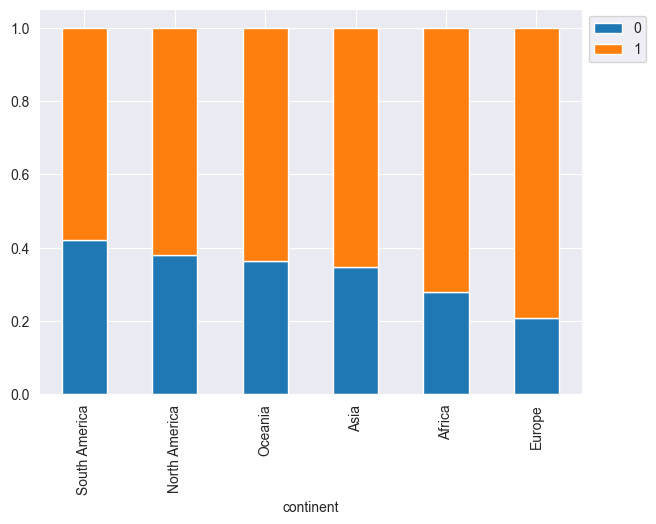

In [143]:
stacked_barplot(df_original,'continent','case_status')

**Observations**
* Nearly 79.2% of applications from Europe have received the certificate and tops all the continents with only 20.7% of denials
* Followed by Africa having approximately 72.1% of total certified applications with 27.9% of denials
* Then comes Asia with approximately 65.3% accepted applications with 34.7 % of denials and has the majority of applicatants from all over the globe.

### **education_of_employee vs case_status**

case_status               0      1    All
education_of_employee                    
All                    8462  17018  25480
Bachelor's             3867   6367  10234
High School            2256   1164   3420
Master's               2059   7575   9634
Doctorate               280   1912   2192
------------------------------------------------------------------------------------------------------------------------


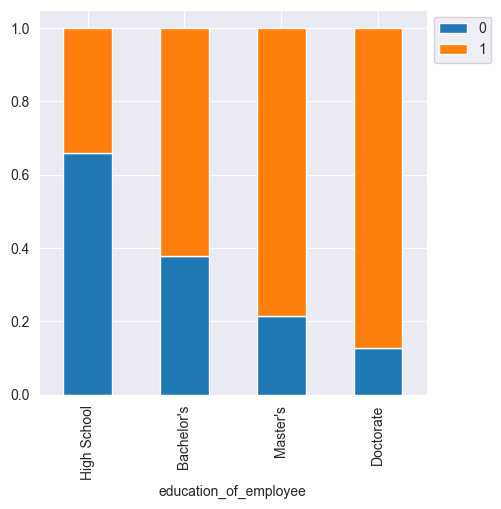

In [147]:
stacked_barplot(df_original,'education_of_employee','case_status')

**Observations**
* Nearly 87.2% of doctorate holder applications were certified while $\approx $12.7% were denied.
* Followed by Master degree holders having approximately 78.6% of certified applications with only 21.4% of denials
* Then comes Bachelor degree holders with approximately 62.2% accepted applications with $\approx $37.7% of denials and has around 10234 of the total applications from all the educational background

### **has_job_experience vs case_status**

case_status            0      1    All
has_job_experience                    
All                 8462  17018  25480
N                   4684   5994  10678
Y                   3778  11024  14802
------------------------------------------------------------------------------------------------------------------------


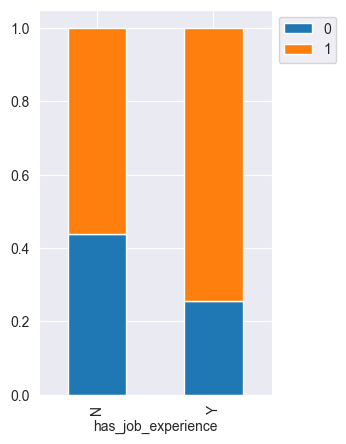

In [151]:
stacked_barplot(df_original,'has_job_experience','case_status')

**Observations**
* Nearly 74.5% of applicants who has previous job experience were certified while $\approx $25.5% were denied, and has a majority of applications of about 14802.
* Approximately 56.13% of applicants who does not have previous working experience were certified while $\approx $43.9% were denied, but has less no. of applications around 10678 compared to the other category

### **requires_job_training vs case_status**

case_status               0      1    All
requires_job_training                    
All                    8462  17018  25480
N                      7513  15012  22525
Y                       949   2006   2955
------------------------------------------------------------------------------------------------------------------------


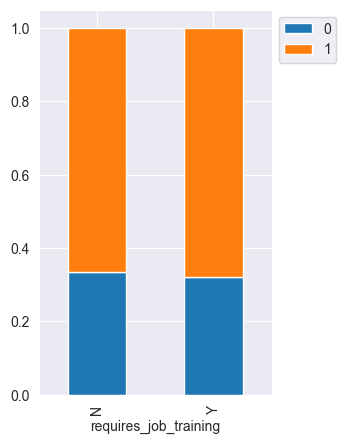

In [155]:
stacked_barplot(df_original,'requires_job_training','case_status')

**Observations**
* Nearly 66.6% of applicants who do not require a job training were certified while $\approx $33.3% were denied, and has a majority of applications of about 22525.
* Approximately 67.8% of applicants who require a job training were certified while $\approx $32.1% were denied, but has very less no. of applications around 2955

### **region_of_employment vs case_status**

case_status              0      1    All
region_of_employment                    
All                   8462  17018  25480
Northeast             2669   4526   7195
West                  2486   4100   6586
South                 2104   4913   7017
Midwest               1054   3253   4307
Island                 149    226    375
------------------------------------------------------------------------------------------------------------------------


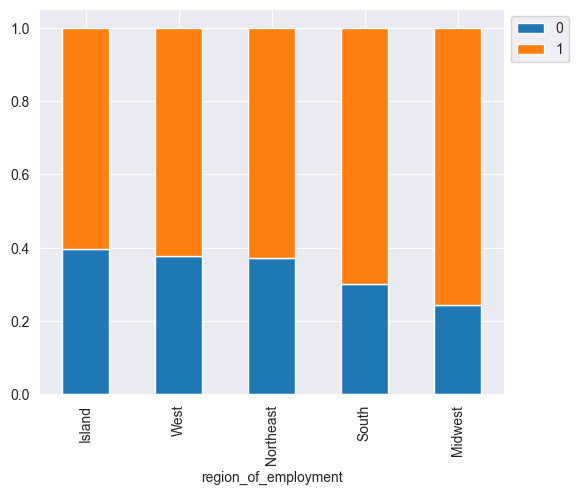

In [159]:
stacked_barplot(df_original,'region_of_employment','case_status')

**Observations**
* The applications from employees who were appointed at midwest region have higher rate of visas certified, which is about 75.5% and lesser denial rates of about 24.5%
* Followed by applicants employed at south, with 70% of certifications and 30% of denials.
* Island seems to have the highest denials with 39.7% with lowest acceptance of 60.3%
* Employments at Northeast and West almost have similar acceptance rates such as 62.9% and 62.2% respectively.

### **unit_of_wage vs case_status**

case_status      0      1    All
unit_of_wage                    
All           8462  17018  25480
Year          6915  16047  22962
Hour          1410    747   2157
Week           103    169    272
Month           34     55     89
------------------------------------------------------------------------------------------------------------------------


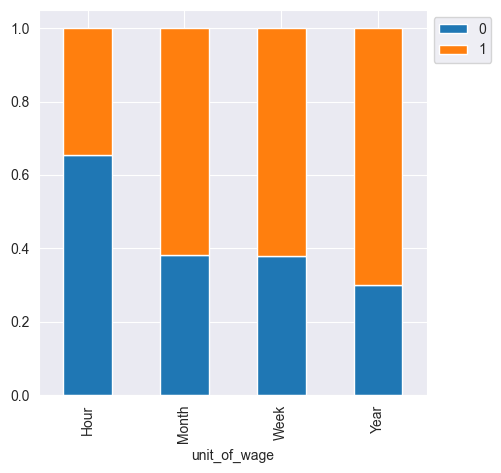

In [163]:
stacked_barplot(df_original,'unit_of_wage','case_status')

**Observations**
* It is noted that applicants who receive their wages in yearly basis have higher visa certifications rate (69.8%) and 30.1% of denials
* Where as applicants whose wages are determined on monthly and weekly basis were said to have almost similar acceptance rates of about 61.8% and 62.1% respectively.
* And the applicants whose wages are of hourly basis face the highest denial rates of about 65.3%

### **full_time_position  vs case_status**

case_status            0      1    All
full_time_position                    
All                 8462  17018  25480
Y                   7610  15163  22773
N                    852   1855   2707
------------------------------------------------------------------------------------------------------------------------


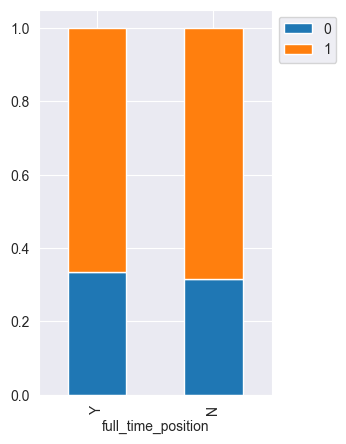

In [167]:
stacked_barplot(df_original,'full_time_position','case_status')

**Observations**
* It seems that the employees positioned in full time face higher denial rates compared to part time employees.
* The acceptance rate for full time employees is 66.6% and for the other category is 68.5%, while still majority of the visa applications come from employers who hire employees for full time which is about 22773 ($\approx $89.3%) of total applications

## **Relationship between numerical variables vs target variable-case_status**

### **prevailing_wage Vs case_status**

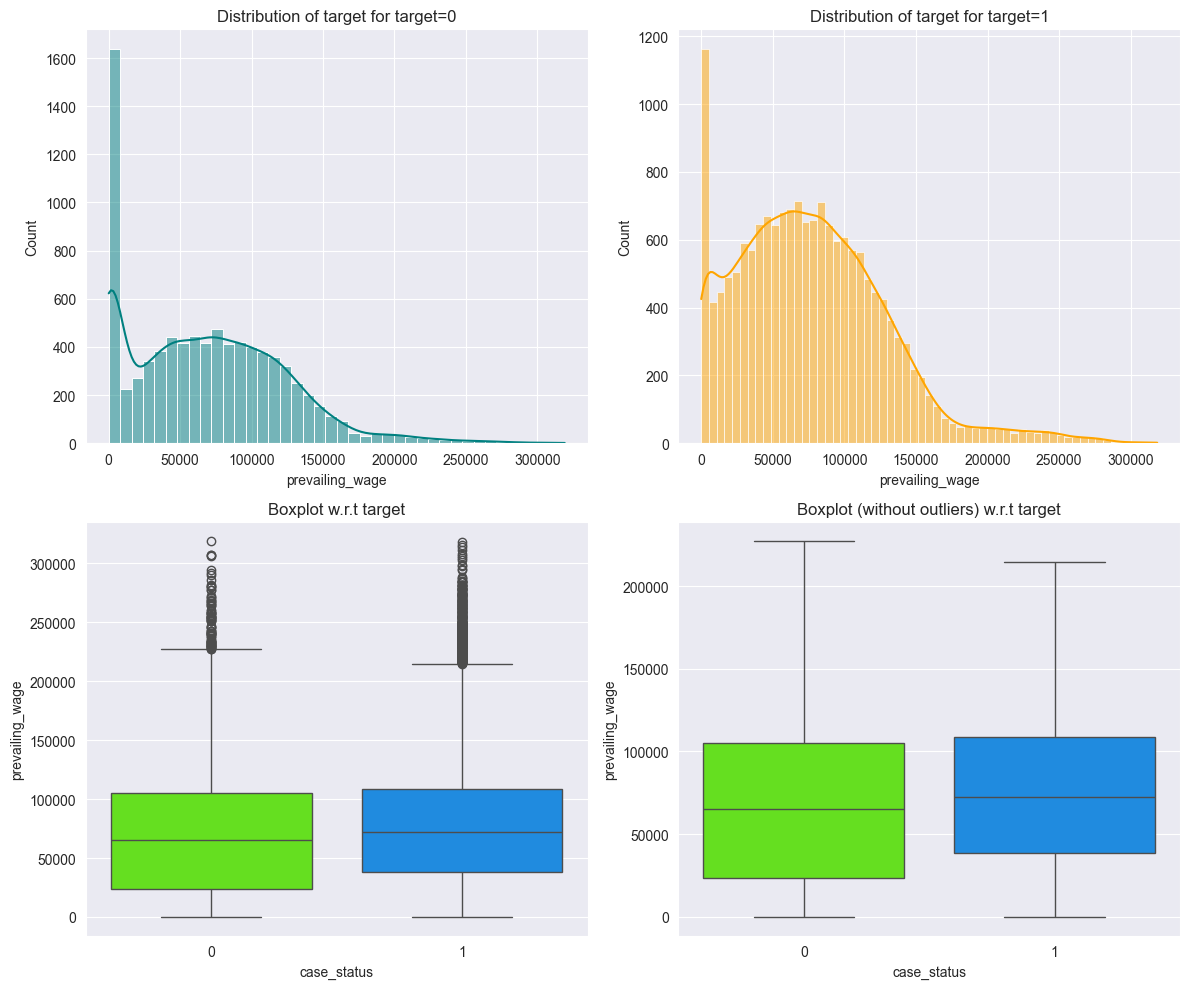

In [172]:
# Checking the distribution of prevailing wage with respect to target
distribution_plot_wrt_target(df_original,'prevailing_wage','case_status')

**Observation:**
* We can observe similar densities in both the case_status and prevailing wage of the employees.
* We can also see,a significantly higher density in the denial for prevailing wage between 0 and 100
* The boxplot of prevailing wage with respect to case_status shows that the median prevailing wage of the employees who are certified is slightly higher.
* Observing the boxplot without outliers, it is seen that the maximum prevailing wage of employees which were denied is higher than those that were certified.

### **no_of_employees Vs case_status**

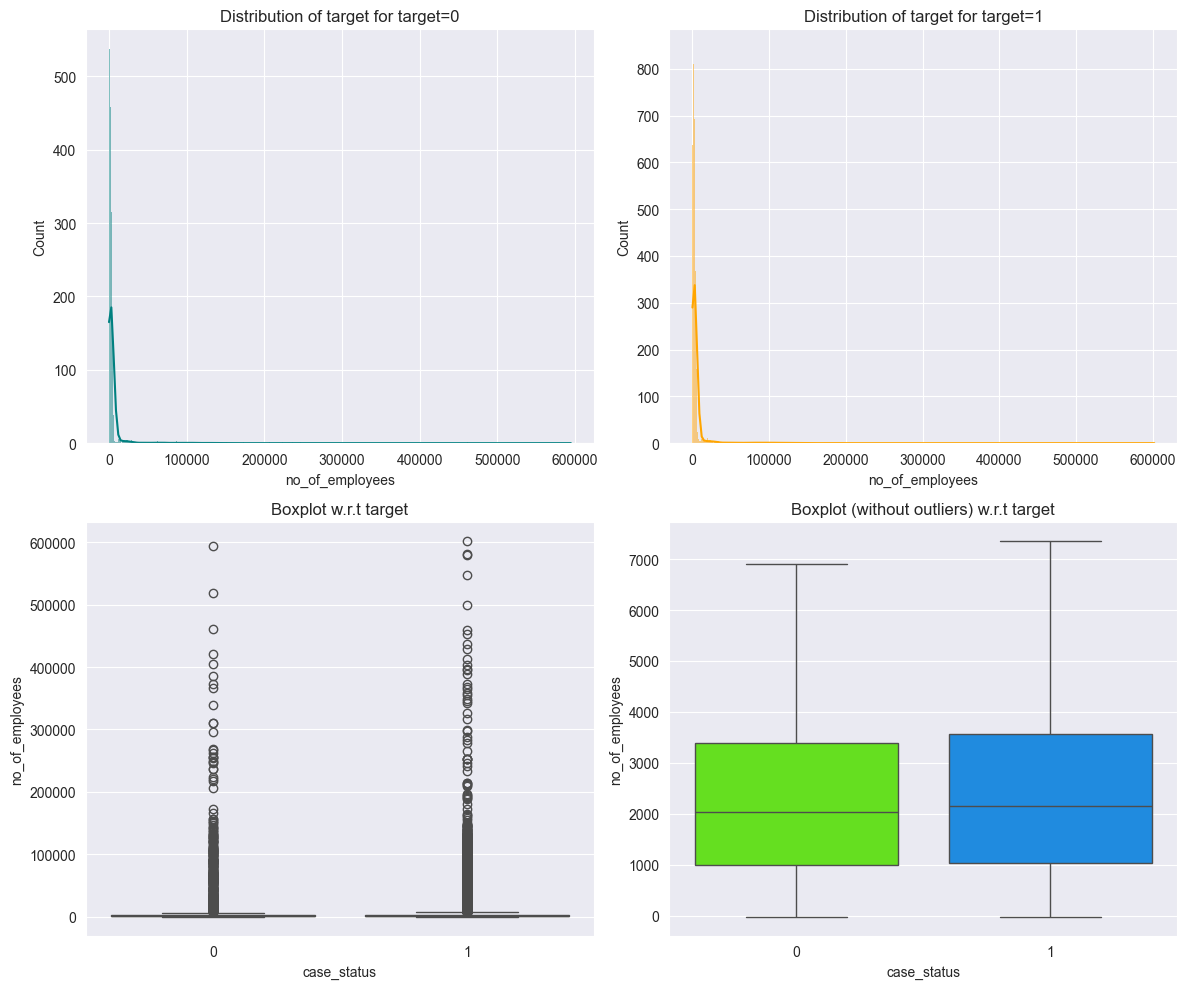

In [176]:
# Checking the distribution of number of employees with respect to target
distribution_plot_wrt_target(df_original,'no_of_employees','case_status')

**Observations:**
* From the density plot and box plots, the applicant's employer company whose visa were certified have slighly higher number of employees than the applicant's employer company that were denied.
* It is evident that company with higher no. of employees working has the feasibility to get the acceptance of their employee's visa applications 

### **yr_of_estab Vs case_status**

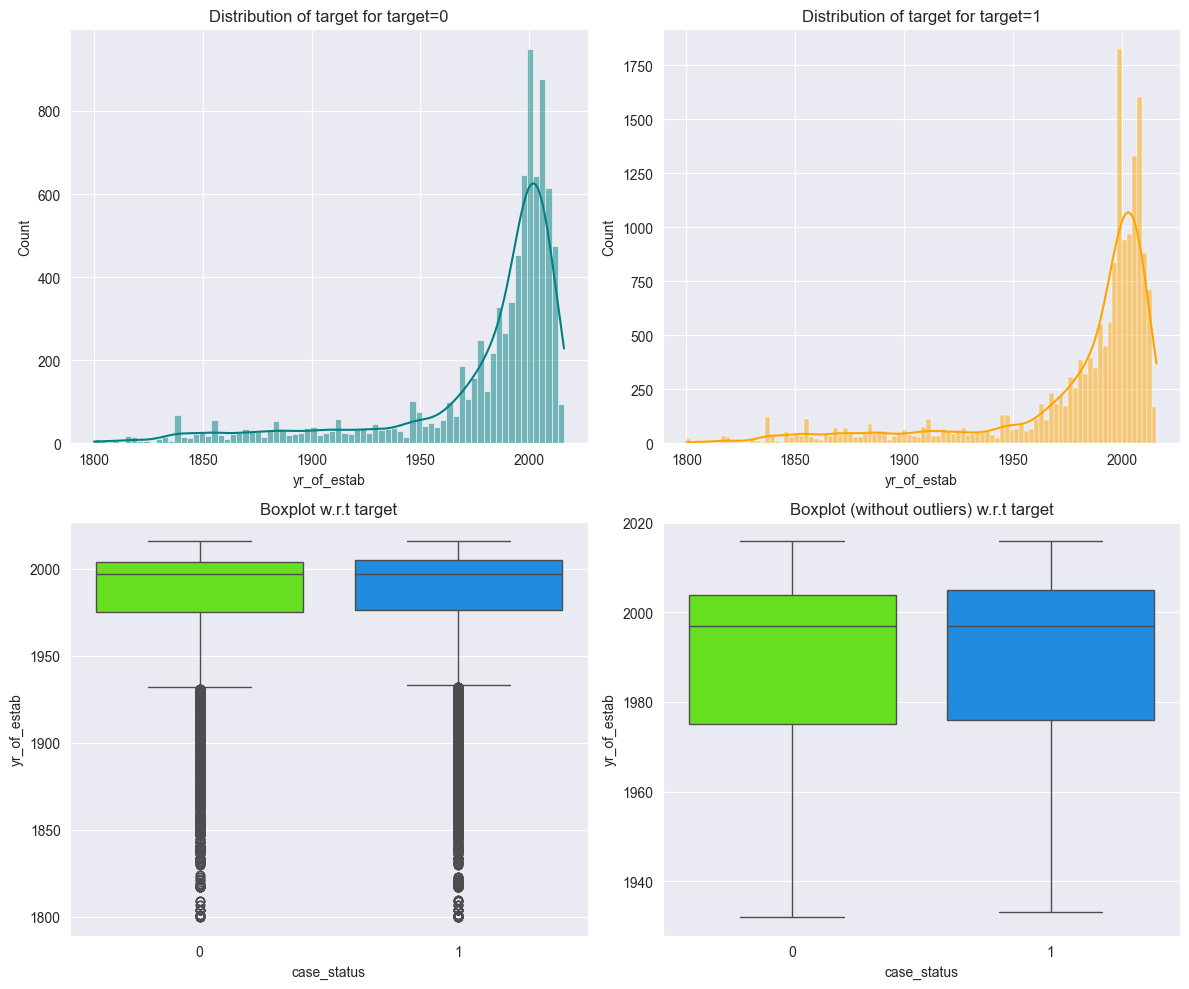

In [180]:
# Checking the distribution of year of establishment with respect to target
distribution_plot_wrt_target(df_original,'yr_of_estab','case_status')

**Observations:**
* From the density plots, we can see that there is no significant difference between the densities of the certified and denied applications with respect to their year of establishment
* From the box plot, with and without outliers, the same observations is made.
* There is a slight difference between the year of establishment of the companies that had certified applications and those that had denials

## **Let's now try to find out some relationship between the other columns**

### **has_job_experience Vs requires_job_training**

requires_job_training      N     Y    All
has_job_experience                       
All                    22525  2955  25480
N                       8988  1690  10678
Y                      13537  1265  14802
------------------------------------------------------------------------------------------------------------------------


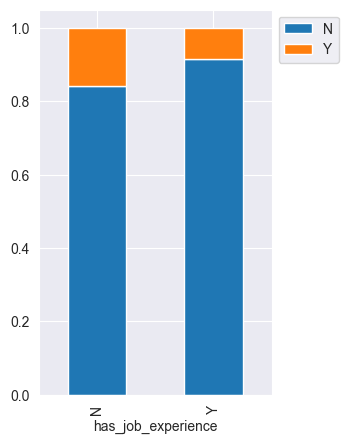

In [185]:
#plotting a barplot to see the relationship between job experience and job training.
stacked_barplot(df_original, "has_job_experience", "requires_job_training")

**Observations**
* Most employees who have job experience did not require job training, that is about 91.4% of total employees who has job experience did not require training, while 8.5% of employees who had previous experience required training
  

### **has_job_experience Vs full_time_position**

full_time_position     N      Y    All
has_job_experience                    
All                 2707  22773  25480
Y                   1410  13392  14802
N                   1297   9381  10678
------------------------------------------------------------------------------------------------------------------------


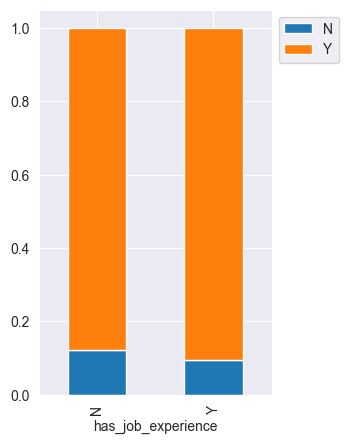

In [189]:
#plotting a barplot to see the relationship between job experience and full_time_position.
stacked_barplot(df_original, "has_job_experience", "full_time_position")

**Observations**
* Most of the employees who have a previous job experience were offered full time positions, about 58.8% of full time positions were offered to employees with prior job experience, while 41.2% of full time workers did not have the previous job experience
* Even for non full time positions, employees with prior experience were opted for about 52.1%.
* It is seen that, people with prior experience were preferred most by the employers in either of the positions.

### **requires_job_training Vs prevailing_wage with hue=case_status**

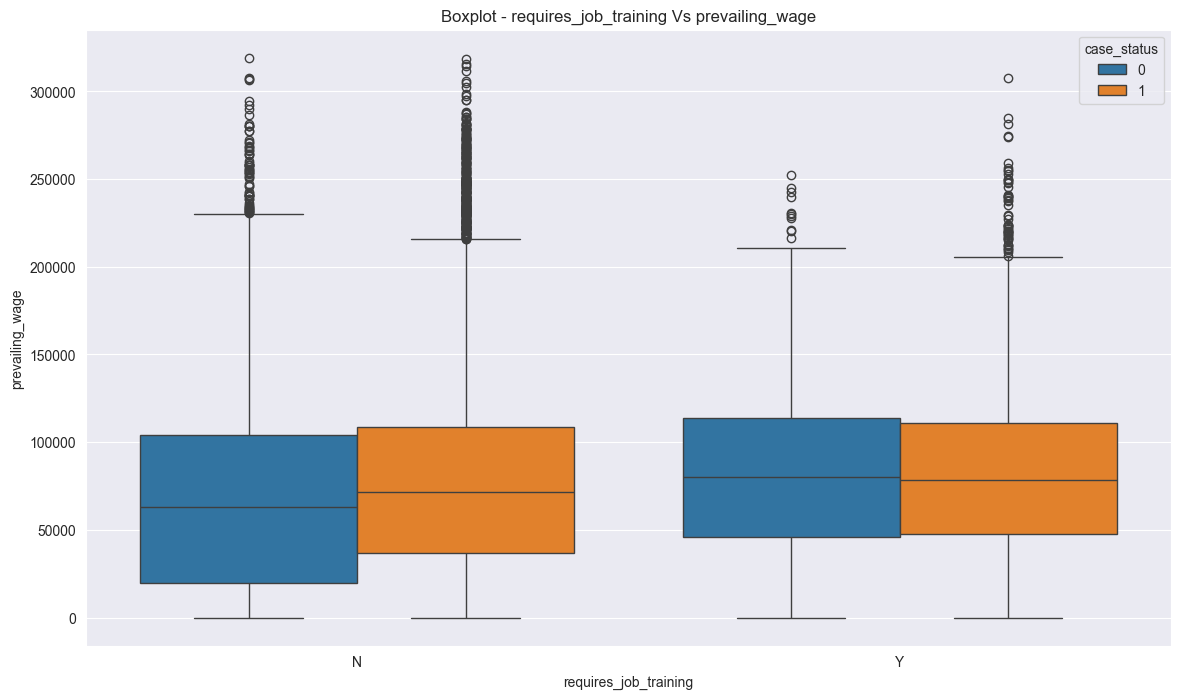

In [193]:
plt.figure(figsize=[14, 8])
sns.boxplot(data = df_original, x = "requires_job_training", y = "prevailing_wage", hue = "case_status")
plt.title("Boxplot - requires_job_training Vs prevailing_wage")
plt.xlabel("requires_job_training")
plt.ylabel("prevailing_wage")
plt.show()

**Observations**
* The 75th percentile of prevailing wage for a certified visa applicant who does not require job training is almost equal to the certified visa applicant does require job training.
* The prevailing wages for "no_job_training" category is slightly more but their visa certifications in both cases looks feasible.
* Hence prevailing wage with respect to job training requirement does not seem to influence visa certifications

### **has_job_experience Vs prevailing_wage with hue=case_status**

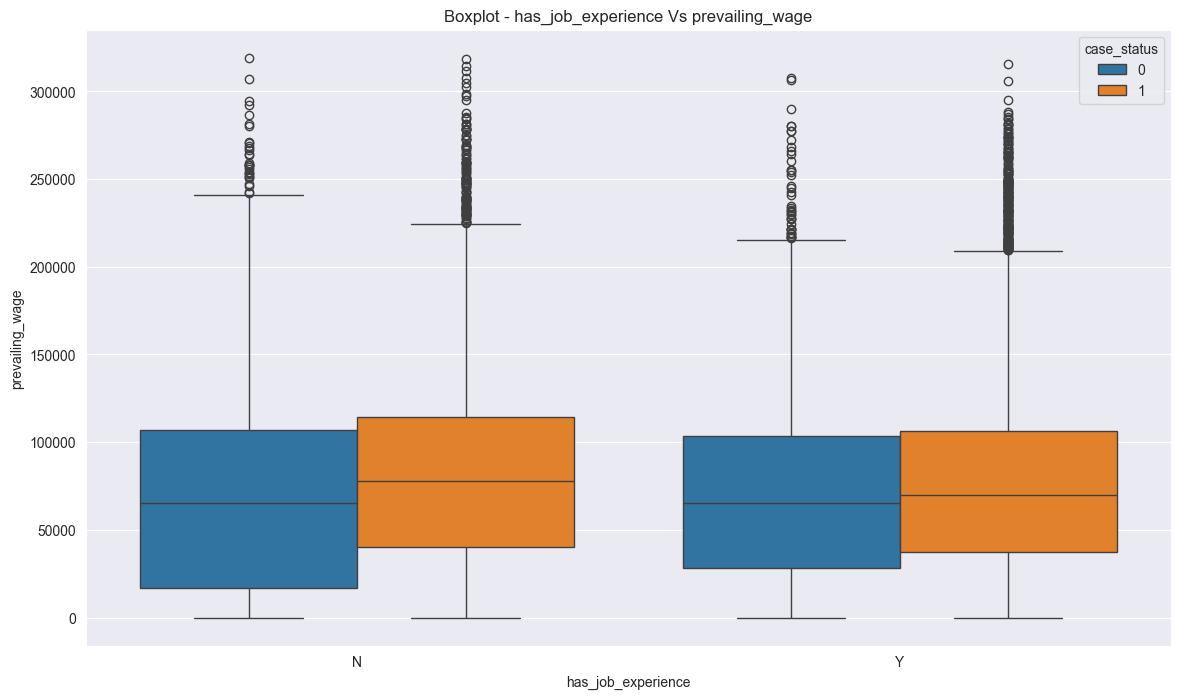

In [197]:
plt.figure(figsize=[14, 8])
sns.boxplot(data = df_original, x = "has_job_experience", y = "prevailing_wage", hue = "case_status")
plt.title("Boxplot - has_job_experience Vs prevailing_wage")
plt.xlabel("has_job_experience")
plt.ylabel("prevailing_wage")
plt.show()

**Observations:**

* The 75th percentile of prevailing wage for a certified visa applicant who does not have a previous job experience is lower to the certified visa applicant who does not have a previous experience.
* The 75th percentile of prevailing wage for visa certified employees is higher compared to the prevailing age of visa denied employees.
* The maximum prevailing wages for "no_experience" category is slightly more but their visa certifications in both cases looks feasible.
* Hence prevailing wage with respect to previous_job_experience does not seem to influence visa certifications

### **continent Vs prevailing_wage with hue=case_status**

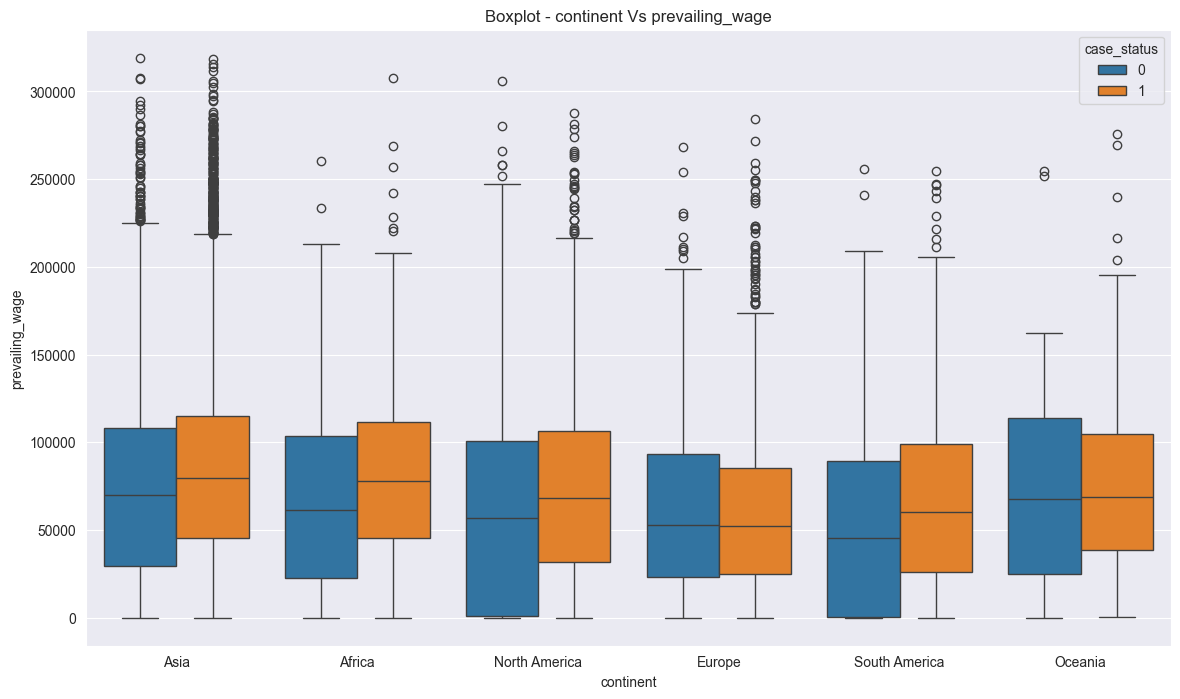

In [201]:
plt.figure(figsize=[14, 8])
sns.boxplot(data = df_original, x = "continent", y = "prevailing_wage", hue = "case_status")
plt.title("Boxplot - continent Vs prevailing_wage")
plt.xlabel("continent")
plt.ylabel("prevailing_wage")
plt.show()

**Observations:**
* The 75th percentile of prevailing_wage for Asian visa certified applicants looks seemingly high compared to all other continents while the prevailing wages for Europeans seems to be the lowest
* For most of the continents with respect to the prevailing wage, the acceptance of visas outnumbers its denials, except for Europe and Oceania
* For Oceania and Europe, the mean prevailing wage for visa accepted and the denied applications remains the same., while for other continents the mean prevailing wage of the accepted applications is high compared to the respective denials of that continent.
* Though the prevailing wages vary with respect to continents, it does not widely influence the visa certifications.

### **region_of_employment Vs prevailing_wage with hue=case_status**

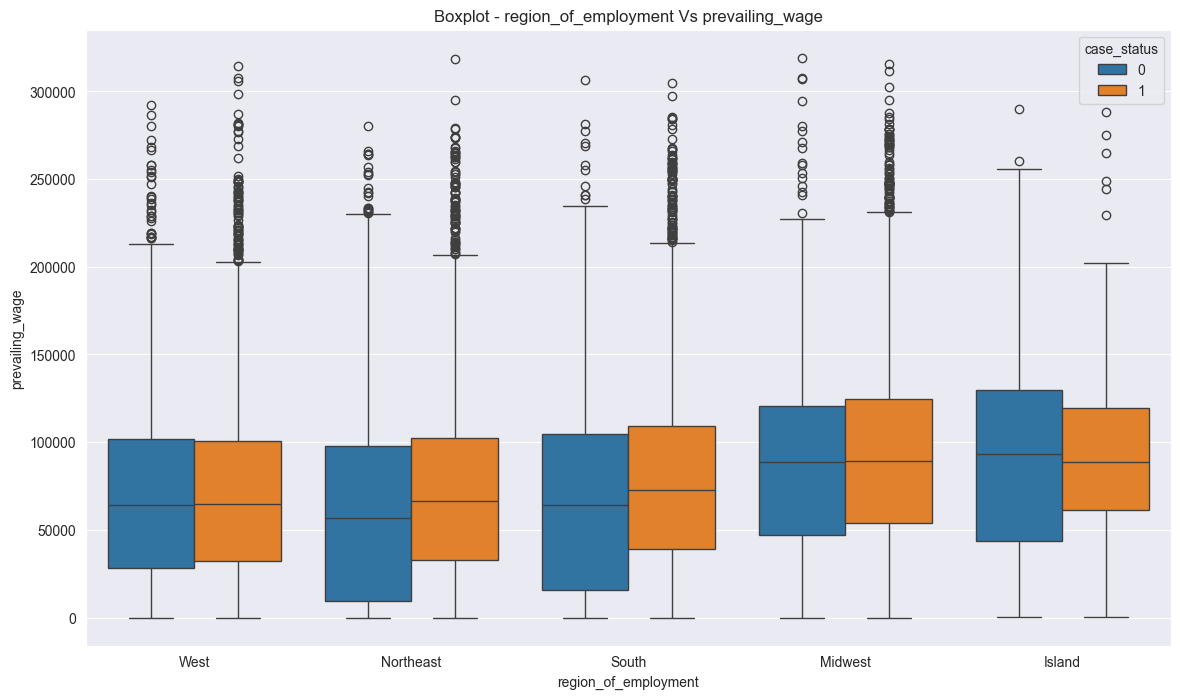

In [205]:
plt.figure(figsize=[14, 8])
sns.boxplot(data = df_original, x = "region_of_employment", y = "prevailing_wage", hue = "case_status")
plt.title("Boxplot - region_of_employment Vs prevailing_wage")
plt.xlabel("region_of_employment")
plt.ylabel("prevailing_wage")
plt.show()

**Observations:**
* The mean prevailing_wage for employees employed at `Midwest` and `Island` regions looks high compared the rest other regions.
* While the mean prevailing wage for employees at the west is the lowest.
* Looking into the outliers of the prevailing wage from all the regions of employment, it is noted that it is higher for visa certified employees.
* Though the prevailing wages vary with respect to regions, it does not influence the visa certifications.

### **education_of_employee Vs no_of_employees with hue=case_status**

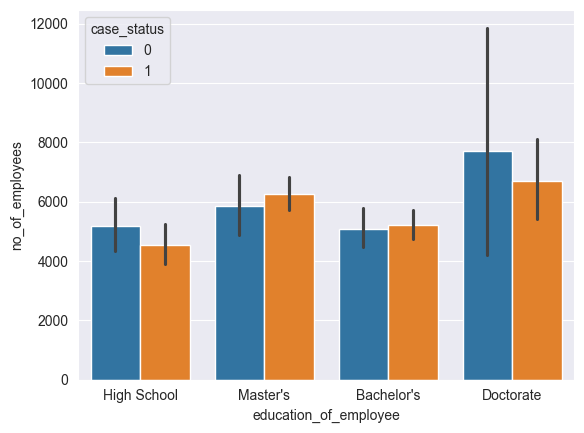

In [225]:
sns.barplot(x="education_of_employee", y="no_of_employees", hue="case_status", data=df_original)
plt.show()

**Observations**
* It is seen that the doctorates are the highest among the accepted visa applicants, followed by Masters, and the maximum no_of_employees in the employers company are also doctorates
* Similarly the maximum no. of applicants who were denied were also doctorates
* The no_of_employees with Masters, has a quite high acceptance than any other education level and next to Doctorates, master degree for employees were much preferred by the employers.

### **Let's analyze the education_of_employee of the visa applicants from different continents**

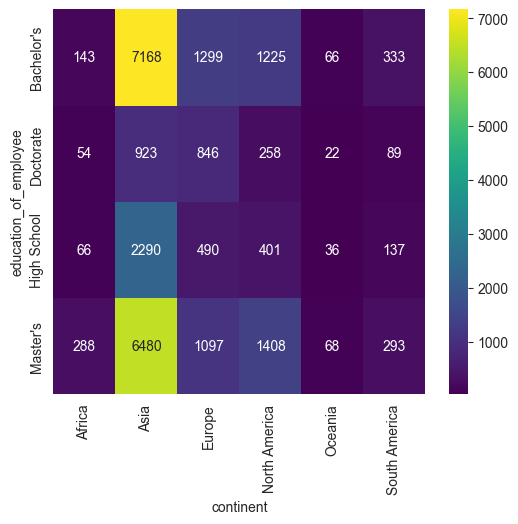

In [229]:
plt.figure(figsize=(6, 5))
sns.heatmap(
    pd.crosstab(df_original["education_of_employee"], df_original["continent"]),
    annot=True,
    fmt="g",
    cmap="viridis",
)
plt.ylabel("education_of_employee")
plt.xlabel("continent")
plt.show()

**Observations:**
* Nearly 6480 visa applications with Masters degree holders are from Asian applicants followed by 1408 applications from North Americans
* Similarly 7168 visa applications with Bachelors degree holders are from Asian applicants followed by 1299 applications from Europeans
* While there are about 293 and 288 Master's from South America and Africa respectively.
* Coming to Doctorates, Europe (846) is just less to Asia (923)

### **Let's analyze the education_of_employee of the visa applicants placed in different region_of_employmen in US**

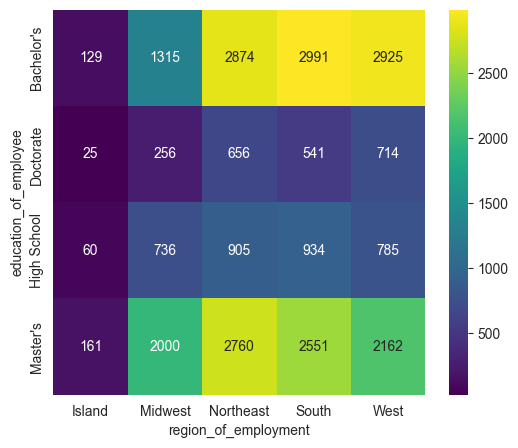

In [233]:
plt.figure(figsize=(6, 5))
sns.heatmap(
    pd.crosstab(df_original["education_of_employee"], df_original["region_of_employment"]),
    annot=True,
    fmt="g",
    cmap="viridis",
)
plt.ylabel("education_of_employee")
plt.xlabel("region_of_employment")
plt.show()

**Observations:**

* Master degree holders were placed widely in different in different regions in US, while majority (2760) were placed in Northeast
* Bachelors were also equally preferred with their placing higher than Masters in Northeast (2874), South (2991) and West (2925) while Midwest (2000) and Island (161) preferred Master's

### **region_of_employment Vs no_of_employees with hue=case_status**

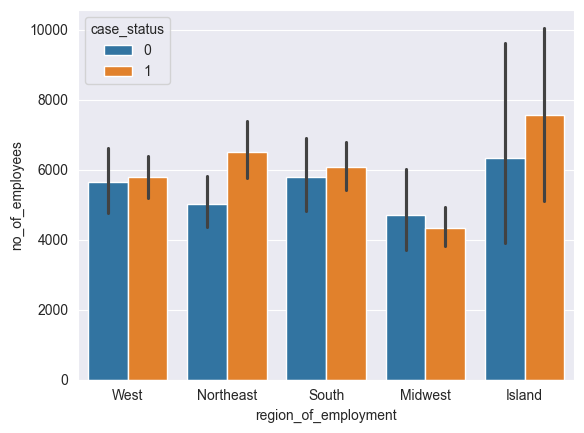

In [237]:
sns.barplot(x="region_of_employment", y="no_of_employees", hue="case_status", data=df_original)
plt.show()

**Observations**
* The no_of employees with accepted visa applications were high compared to denials in almost all regions like `West`, `Northeast`, `South` and `Island`, except for `Midwest`, where the denials are higher than acceptance.
* Most of employees approximately higher than 10k were placed in `Islands`

### **continent Vs no_of_employees with hue=case_status**

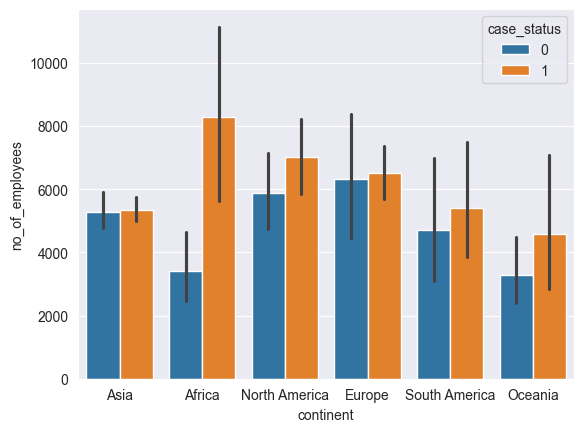

In [241]:
sns.barplot(x="continent", y="no_of_employees", hue="case_status", data=df_original)
plt.show()

**Observations:** 
* Most of the employees in company's profile, whose visas were certified were Africans, followed by North America, Europe, Asia, South America and Oceania.
* It is seen that the certified visas outnumber the denials for employees from all over the globe

### **Insights based on EDA**

* It is observed that the visa applications are from applicants who are employed in various firms, which were established from `1800` to `2016`.
* It is observed that there are high number of applications from applicants who are employed in companies established by 2000 and later, and it is also observed from the density plots, that there is no significant difference between the densities of the certified and denied applications with respect to their year of establishment
* The prevailing_wage falls under 4 categories such as `Year`, `Hour`, `Week`, and `Month`. Hence all the observations are found to be meaningful and the prevailing wage with respect to case_status shows that the median prevailing wage of the employees who are certified is slightly higher.
* It is observed that there is significantly higher density in the denial for prevailing wage between 0 and 100 and there is also a high dense of applications with their prevailing wage less than 1 lakh USD.
* The employer's company profile of the visa applicants is shown such that majority of the companies have less than 1 lakh employees working in their firms, but from the density plot and box plots, it is evident that company with higher no. of employees working has the feasibility to get the acceptance of their employee's visa applications.
* Most of the visa applicants belong to Asian continent, and nearly 79.2% of applications from Europe have received the certificate and tops all the continents with only 20.7% of denials.
* While most of the employees in company's profile, whose visas were certified were Africans, followed by North America, Europe, Asia, South America and Oceania.
* Most of the visa applicants have completed bachelors degree, the percentage of employees who have a masters degree is slightly lower than the bachelor's.
* It is also observed that the no_of_employees with Masters, has a quite high acceptance than any other education level and next to Doctorates, master degree for employees were much preferred by the employers.
* Nearly 87.2% of doctorate holder applications were certified while $\approx $12.7% were denied, while 10234 applications were from Bachelor degree holders
* Nearly 58.1% of visa applications have a previous job experience while 41.9% were without an experience.
* Nearly 74.5% of applicants who has previous job experience were certified while $\approx $25.5% were denied, and has a majority of applications of about 14802. Most employees who have job experience did not require job training.
* Almost 88.4% of the visa applicants do not require a job_training while a least percentage of about 11.6% require training for their profession.
* Nearly 66.6% of applicants who do not require a job training were certified while $\approx $33.3% were denied, and has a majority of applications of about 22525.
* The visa applications from employees working in the Northeast region tops with 28.2% followed by South and West regions, while most of the employees approximately higher than 10k were placed in `Islands`
* The applications from employees who were appointed at midwest region have higher rate of visas certified, which is about 75.5% and lesser denial rates of about 24.5%
* The most used unit of wage is the `Year` unit, and this explains the right skewed distribution of the prevailing wage distribution. It is noted that applicants who receive their wages in yearly basis have higher visa certifications rate (69.8%) and 30.1% of denials
* The employees who are working in `full_time_position` are the major ones to apply for visa, whereas part_time employees are the least ($\approx $10.6%)
* The acceptance rate for full time employees is 66.6% and for the other category is 68.5%, while still majority of the visa applications come from employers who hire employees for full time which is about 22773 ($\approx $89.3%) of total applications. Even for non full time positions, employees with prior experience were opted for about 52.1%.
* From the heatmap, it is understood that there is no much correlation between the numerical columns of the dataset.
* On the overall, it is observed that the certified visas outnumbers the denials, that is a majority of the applicants ($\approx $66.8%) were Certified with visa, while less no. of applicants ($\approx $33.2%) were Denied.

## **Feature Engineering...Data Preprocessing**

#### **View the negative values in `no_of_employees` and convert them to positive using `abs` funtion**

In [107]:
#Visualize the negative values
df_original_no_of_emp = df_original.loc[df_original['no_of_employees'] < 0]
df_original_no_of_emp.head()

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
245,Europe,Master's,N,N,-25,1980,Northeast,39452.990,Year,Y,1
378,Asia,Bachelor's,N,Y,-11,2011,Northeast,32506.140,Year,Y,0
832,South America,Master's,Y,N,-17,2002,South,129701.940,Year,Y,1
2918,Asia,Master's,Y,N,-26,2005,Midwest,112799.460,Year,Y,1
6439,Asia,Bachelor's,N,N,-14,2013,South,103.970,Hour,Y,0


In [109]:
#Analyse the shape of the dataframe 'df_original_no_of_emp`
df_original_no_of_emp.shape

(33, 11)

* We see that there are 33 rows which has negative values for the data about `no_of_employees`
* This need to be considered as positive value

In [112]:
#Change the negative to positive 
df_original["no_of_employees"] = abs(df_original["no_of_employees"]) 

In [114]:
#Lets check if it has changed
df_original.loc[df_original['no_of_employees'] < 0].head()

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status


#### **Outlier Detection**

In [117]:
Q1 = df_original.select_dtypes(include=["int64", "float64"]).quantile(0.25)  # To find the 25th percentile
Q3 = df_original.select_dtypes(include=["int64", "float64"]).quantile(0.75)  # To find the 75th percentile

IQR = Q3 - Q1  # Inter Quantile Range (75th perentile - 25th percentile)

# Finding lower and upper bounds for all values. All values outside these bounds are outliers
lower = (Q1 - 1.5 * IQR)
upper = (Q3 + 1.5 * IQR)

In [119]:
# checking the % outliers
((df_original.select_dtypes(include=["float64", "int64"]) < lower) | (df_original.select_dtypes(include=["float64", "int64"]) > upper)).sum() / len(df_original) * 100

no_of_employees    6.107
yr_of_estab       12.794
prevailing_wage    1.676
case_status        0.000
dtype: float64

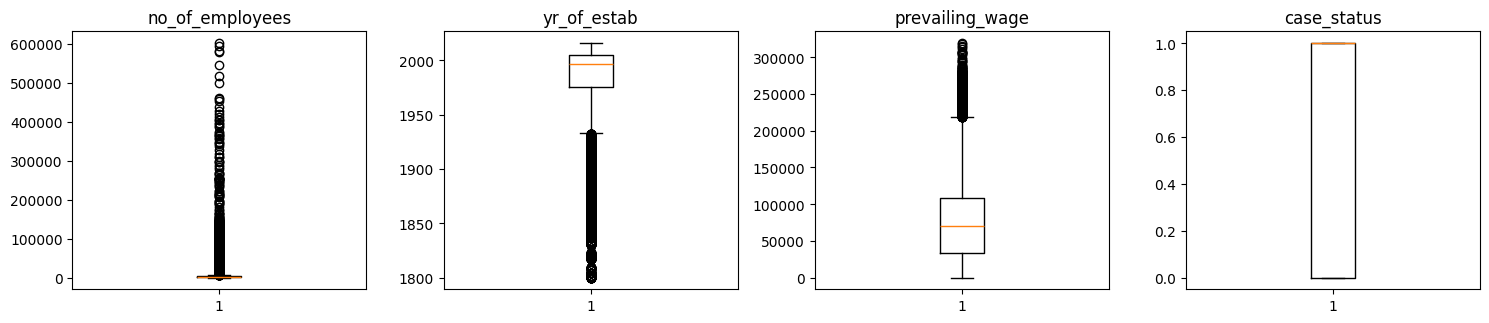

In [121]:
# outlier detection using boxplot
numeric_columns = df_original.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(df_original[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

**Outlier Treatment**

The three numerical variables have outliers, however we will not treat them for the following reasons:

1. The no of employees can vary depending on the `yr_of_estab`of the companies and the type of business the company is involved in.
   So it is not a weird thing to find companies with lakhs of employees, especially when the company has been established long before. So the outliers      showing extreme count of employees can't be treated.

2. For the year of establishment, it is not unusual to see companies being established in 1800 and still running over 200 years.
   Some companies have been for generations, while others have just been started. Thus the outliers in `yr_of_estab` contain valuable information about     the employer company.

3. The prevailing wage is recorded without considering the unit of wages, thus, if outliers were treated, the adequate information cannot be captured       efficiently. Prevailing wage also can vary based on many factors such as the `region_of_employment`, `education_of_employee`, `continent`, level of      experience and so on. Hence, the outliers in this column is not treated.

#### **Data Preparation for Modeling**

**Assigning of dependent and independent variables**

In [126]:
X = df_original.drop(["case_status"], axis=1)
y = df_original["case_status"]

**Splitting of data into train, validation and test sets**

In [129]:
# Splitting data into training, validation and test set:
# first we split data into 2 parts, say temporary and test

X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1, stratify=y
)

# then we split the temporary set into train and validation

X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, random_state=1, stratify=y_temp
)
print(X_train.shape, X_val.shape, X_test.shape)

(15288, 10) (5096, 10) (5096, 10)


#### **Splitting of data before building of the model ensures no data leakage among train-test and validation sets**

#### `Train Dataset`

In [133]:
cols = X_train.select_dtypes(include=["object", "category"])
for i in cols.columns:
    print(X_train[i].value_counts())
    print("*" * 30)

continent
Asia             10085
Europe            2285
North America     1944
South America      528
Africa             333
Oceania            113
Name: count, dtype: int64
******************************
education_of_employee
Bachelor's     6141
Master's       5792
High School    2045
Doctorate      1310
Name: count, dtype: int64
******************************
has_job_experience
Y    8845
N    6443
Name: count, dtype: int64
******************************
requires_job_training
N    13477
Y     1811
Name: count, dtype: int64
******************************
region_of_employment
Northeast    4312
South        4248
West         3920
Midwest      2576
Island        232
Name: count, dtype: int64
******************************
unit_of_wage
Year     13786
Hour      1286
Week       156
Month       60
Name: count, dtype: int64
******************************
full_time_position
Y    13678
N     1610
Name: count, dtype: int64
******************************


#### `Validation Dataset`

In [136]:
cols = X_val.select_dtypes(include=["object", "category"])
for i in cols.columns:
    print(X_val[i].value_counts())
    print("*" * 30)

continent
Asia             3395
Europe            713
North America     655
South America     173
Africa            121
Oceania            39
Name: count, dtype: int64
******************************
education_of_employee
Bachelor's     2033
Master's       1886
High School     694
Doctorate       483
Name: count, dtype: int64
******************************
has_job_experience
Y    2963
N    2133
Name: count, dtype: int64
******************************
requires_job_training
N    4501
Y     595
Name: count, dtype: int64
******************************
region_of_employment
Northeast    1430
South        1389
West         1352
Midwest       855
Island         70
Name: count, dtype: int64
******************************
unit_of_wage
Year     4576
Hour      452
Week       57
Month      11
Name: count, dtype: int64
******************************
full_time_position
Y    4552
N     544
Name: count, dtype: int64
******************************


#### `Test Dataset`

In [139]:
cols = X_test.select_dtypes(include=["object", "category"])
for i in cols.columns:
    print(X_test[i].value_counts())
    print("*" * 30)

continent
Asia             3381
Europe            734
North America     693
South America     151
Africa             97
Oceania            40
Name: count, dtype: int64
******************************
education_of_employee
Bachelor's     2060
Master's       1956
High School     681
Doctorate       399
Name: count, dtype: int64
******************************
has_job_experience
Y    2994
N    2102
Name: count, dtype: int64
******************************
requires_job_training
N    4547
Y     549
Name: count, dtype: int64
******************************
region_of_employment
Northeast    1453
South        1380
West         1314
Midwest       876
Island         73
Name: count, dtype: int64
******************************
unit_of_wage
Year     4600
Hour      419
Week       59
Month      18
Name: count, dtype: int64
******************************
full_time_position
Y    4543
N     553
Name: count, dtype: int64
******************************


In [141]:
# Calculate the percentage of the training, validation and test sets relative to the respective splits
# We first split the entire dataset into temp and test sets
total_samples = len(X_temp) + len(X_test)
test_percentage = (len(X_test) / total_samples) * 100
# Then We first split the temp dataset into train and val sets
train_percentage = (len(X_train) / total_samples) * 100
val_percentage = (len(X_val) / total_samples) * 100

print("\nPercentage of Train set:", train_percentage, "%")
print("Percentage of Validation set:", val_percentage, "%")
print("Percentage of Test set:", test_percentage, "%")


Percentage of Train set: 60.0 %
Percentage of Validation set: 20.0 %
Percentage of Test set: 20.0 %


### Creating Dummy Variables

In [144]:
X_train = pd.get_dummies(X_train, drop_first=True)
X_val = pd.get_dummies(X_val, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)
print(X_train.shape, X_val.shape, X_test.shape)

(15288, 21) (5096, 21) (5096, 21)


* After encoding there are 21 columns.

#### `Dummy created Train Dataset`

In [148]:
X_train.head()

,no_of_employees,yr_of_estab,prevailing_wage,continent_Asia,continent_Europe,continent_North America,continent_Oceania,continent_South America,education_of_employee_Doctorate,education_of_employee_High School,education_of_employee_Master's,has_job_experience_Y,requires_job_training_Y,region_of_employment_Midwest,region_of_employment_Northeast,region_of_employment_South,region_of_employment_West,unit_of_wage_Month,unit_of_wage_Week,unit_of_wage_Year,full_time_position_Y
5008,1020,2008,70919.850,True,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,True,True
12951,1624,2003,59082.940,False,True,False,False,False,False,False,True,True,True,False,True,False,False,False,False,True,True
3214,438,1991,22235.800,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,True
18876,211,1911,18937.370,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,True
21939,2696,2007,65906.820,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,True


In [150]:
cols = X_train.select_dtypes(include=["boolean"])
for i in cols.columns:
    print(X_train[i].value_counts())
    print("*" * 30)

continent_Asia
True     10085
False     5203
Name: count, dtype: int64
******************************
continent_Europe
False    13003
True      2285
Name: count, dtype: int64
******************************
continent_North America
False    13344
True      1944
Name: count, dtype: int64
******************************
continent_Oceania
False    15175
True       113
Name: count, dtype: int64
******************************
continent_South America
False    14760
True       528
Name: count, dtype: int64
******************************
education_of_employee_Doctorate
False    13978
True      1310
Name: count, dtype: int64
******************************
education_of_employee_High School
False    13243
True      2045
Name: count, dtype: int64
******************************
education_of_employee_Master's
False    9496
True     5792
Name: count, dtype: int64
******************************
has_job_experience_Y
True     8845
False    6443
Name: count, dtype: int64
******************************
requi

#### `Dummy created Validation Dataset`

In [153]:
X_val.head()

,no_of_employees,yr_of_estab,prevailing_wage,continent_Asia,continent_Europe,continent_North America,continent_Oceania,continent_South America,education_of_employee_Doctorate,education_of_employee_High School,education_of_employee_Master's,has_job_experience_Y,requires_job_training_Y,region_of_employment_Midwest,region_of_employment_Northeast,region_of_employment_South,region_of_employment_West,unit_of_wage_Month,unit_of_wage_Week,unit_of_wage_Year,full_time_position_Y
6360,1282,2008,117135.280,False,False,True,False,False,False,False,True,False,False,False,False,False,True,False,False,True,False
16248,2586,1984,7242.390,True,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,True,True
5828,877,2012,36973.670,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,False,True,False
22590,3822,1992,112220.650,False,True,False,False,False,False,True,False,True,False,False,True,False,False,False,False,True,True
20335,2995,1969,64695.100,True,False,False,False,False,False,False,True,True,False,True,False,False,False,False,False,True,False


In [155]:
cols = X_val.select_dtypes(include=["boolean"])
for i in cols.columns:
    print(X_val[i].value_counts())
    print("*" * 30)

continent_Asia
True     3395
False    1701
Name: count, dtype: int64
******************************
continent_Europe
False    4383
True      713
Name: count, dtype: int64
******************************
continent_North America
False    4441
True      655
Name: count, dtype: int64
******************************
continent_Oceania
False    5057
True       39
Name: count, dtype: int64
******************************
continent_South America
False    4923
True      173
Name: count, dtype: int64
******************************
education_of_employee_Doctorate
False    4613
True      483
Name: count, dtype: int64
******************************
education_of_employee_High School
False    4402
True      694
Name: count, dtype: int64
******************************
education_of_employee_Master's
False    3210
True     1886
Name: count, dtype: int64
******************************
has_job_experience_Y
True     2963
False    2133
Name: count, dtype: int64
******************************
requires_job_traini

#### `Dummy created test Dataset`

In [158]:
X_test.head()

,no_of_employees,yr_of_estab,prevailing_wage,continent_Asia,continent_Europe,continent_North America,continent_Oceania,continent_South America,education_of_employee_Doctorate,education_of_employee_High School,education_of_employee_Master's,has_job_experience_Y,requires_job_training_Y,region_of_employment_Midwest,region_of_employment_Northeast,region_of_employment_South,region_of_employment_West,unit_of_wage_Month,unit_of_wage_Week,unit_of_wage_Year,full_time_position_Y
6726,287,2005,72125.460,True,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,True,True
9404,708,2005,110222.490,True,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,True,True
12977,1524,1928,72723.490,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,True
16089,3928,1973,516.505,False,False,True,False,False,False,False,True,False,False,False,True,False,False,False,False,False,True
15284,3081,2000,107725.690,True,False,False,False,False,False,True,False,True,False,False,True,False,False,False,False,True,True


In [160]:
cols = X_test.select_dtypes(include=["boolean"])
for i in cols.columns:
    print(X_test[i].value_counts())
    print("*" * 30)

continent_Asia
True     3381
False    1715
Name: count, dtype: int64
******************************
continent_Europe
False    4362
True      734
Name: count, dtype: int64
******************************
continent_North America
False    4403
True      693
Name: count, dtype: int64
******************************
continent_Oceania
False    5056
True       40
Name: count, dtype: int64
******************************
continent_South America
False    4945
True      151
Name: count, dtype: int64
******************************
education_of_employee_Doctorate
False    4697
True      399
Name: count, dtype: int64
******************************
education_of_employee_High School
False    4415
True      681
Name: count, dtype: int64
******************************
education_of_employee_Master's
False    3140
True     1956
Name: count, dtype: int64
******************************
has_job_experience_Y
True     2994
False    2102
Name: count, dtype: int64
******************************
requires_job_traini

# **Model Building**

### Model can make wrong predictions as:
1. Predicting the recommendation of the visa application as “Certified”, but in reality it has to be denied – False Positive - Loss of opportunity for US citizens  
2. Predicting the recommendation of the visa application as “Denied” but in reality it has to be certified - False Negative - Loss of valuable resource

### Which case is more important?
* **Both are important:**

    * If the visa application is recommended as `“Certified”`, but it has to be `“Denied”`, then the US embassy would end up giving the opportunity to a wrong person who would not contribute to the growth of the company and in turn to the country’s economy. The wrong person would also grab the job opportunity of an US citizen, for whom that position would have been of great benefit.

    * If the visa application is recommended as `“Denied”`, but it has to be `“Certified”`, then the US embassy would end up missing a valuable human resource who would contribute to the development of the organization and in turn for the economy of the country. 

### How to reduce these costs  i.e maximize True Positives?
* **We need to reduce both False Negatives and False Positives**

* **F1 score** should be maximized as the greater the f1_score, the higher the chances of reducing both False Negatives and False Positives and identifying both the classes correctly

* F1_score is computed as
  $$f1\_score = \frac{2 * Precision * Recall}{Precision + Recall}$$

**Let's define a function to output different metrics (including F1_score) on the train and test set and a function to show confusion matrix so that we do not have to use the same code repetitively while evaluating models.**

In [165]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [167]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

# **Model Building - ORIGINAL DATA**

In [170]:

models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1, class_weight='balanced')))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))
models.append(("dtree", DecisionTreeClassifier(random_state=1, class_weight='balanced')))


names = []  # Empty list to store name of the models
results = []

print("\n" "Cross-Validation Performance:" "\n")
for name, model in models:
    scoring = "f1"
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train, y=y_train, scoring=scoring, cv=kfold
    )
    results.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean() * 100))

print("\n" "Performance of the models on train and validation sets:" "\n")
for name, model in models:
    model.fit(X_train, y_train)
    score_acc = accuracy_score(y_train, model.predict(X_train))
    score_pre = precision_score(y_train, model.predict(X_train))
    score_rec = recall_score(y_train, model.predict(X_train))
    score_f1 = f1_score(y_train, model.predict(X_train))
    
    score_val_acc = accuracy_score(y_val, model.predict(X_val))
    score_val_pre = precision_score(y_val, model.predict(X_val))
    score_val_rec = recall_score(y_val, model.predict(X_val))
    score_val_f1 = f1_score(y_val, model.predict(X_val))
    
    print("{}: ".format(name))
   
    df_perf =[{"": 'Train Perf',"Accuracy": score_acc, "Recall": score_rec, "Precision": score_pre, "F1": score_f1}, 
                {"": 'Valset Perf', "Accuracy": score_val_acc, "Recall": score_val_rec, "Precision": score_val_pre, "F1": score_val_f1}]
    df = pd.DataFrame(df_perf)
    print(df)
    print("\n")
    


Cross-Validation Performance:

Bagging: 77.49819034445665
Random forest: 80.43381835409008
GBM: 82.23176915133634
Adaboost: 82.09082175550402
Xgboost: 80.88109618665464
dtree: 74.23560177028313

Performance of the models on train and validation sets:

Bagging: 
                Accuracy  Recall  Precision    F1
0   Train Perf     0.986   0.987      0.992 0.989
1  Valset Perf     0.699   0.771      0.776 0.774


Random forest: 
                Accuracy  Recall  Precision    F1
0   Train Perf     1.000   1.000      1.000 1.000
1  Valset Perf     0.727   0.842      0.771 0.805


GBM: 
                Accuracy  Recall  Precision    F1
0   Train Perf     0.758   0.879      0.785 0.829
1  Valset Perf     0.755   0.873      0.785 0.827


Adaboost: 
                Accuracy  Recall  Precision    F1
0   Train Perf     0.740   0.888      0.762 0.820
1  Valset Perf     0.738   0.881      0.764 0.818


Xgboost: 
                Accuracy  Recall  Precision    F1
0   Train Perf     0.855   0.939    

In [172]:
print("\nTraining and Validation Performance Difference in F1_score:\n")

for name, model in models:
    model.fit(X_train, y_train)
    scores_train = f1_score(y_train, model.predict(X_train))
    scores_val = f1_score(y_val, model.predict(X_val))
    difference1 = scores_train - scores_val
    print("{}: Training Score: {:.4f}, Validation Score: {:.4f}, Difference: {:.4f}".format(name, scores_train, scores_val, difference1))    


Training and Validation Performance Difference in F1_score:

Bagging: Training Score: 0.9892, Validation Score: 0.7737, Difference: 0.2155
Random forest: Training Score: 1.0000, Validation Score: 0.8050, Difference: 0.1950
GBM: Training Score: 0.8291, Validation Score: 0.8266, Difference: 0.0025
Adaboost: Training Score: 0.8204, Validation Score: 0.8180, Difference: 0.0024
Xgboost: Training Score: 0.8963, Validation Score: 0.8079, Difference: 0.0884
dtree: Training Score: 1.0000, Validation Score: 0.7486, Difference: 0.2514


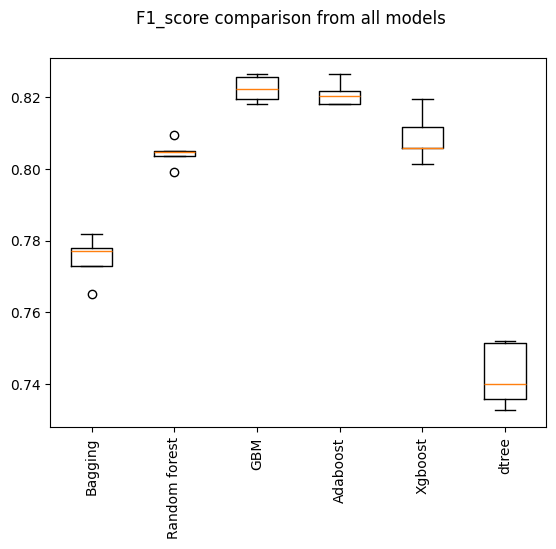

In [174]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure()

fig.suptitle("F1_score comparison from all models")
ax = fig.add_subplot(111)

plt.boxplot(results)
ax.set_xticklabels(names)
plt.xticks(rotation=90)

plt.show()

**Observation**

- We can see that the Gradient Boosting mechanism is giving the highest cross-validated f1_score followed by Adaboost
- The boxplot shows that the performance of GradientBoost and Adaboost is consistent and their performance on the validation set is also good with a very low difference of 0.0025 and 0.0024 respectively.

Bagging: 


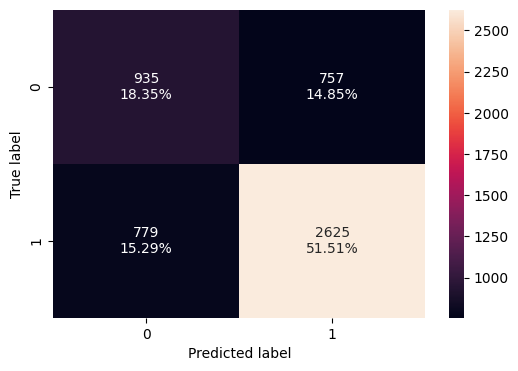

Random forest: 


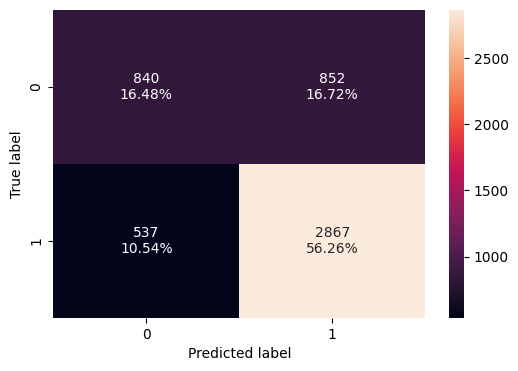

GBM: 


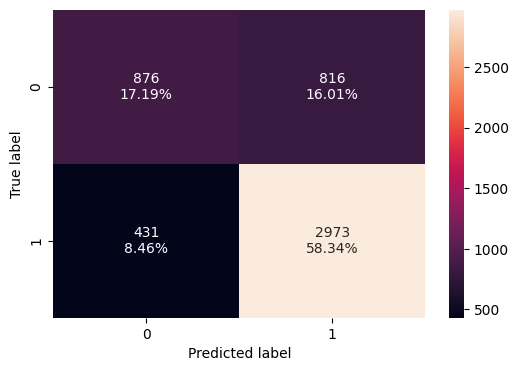

Adaboost: 


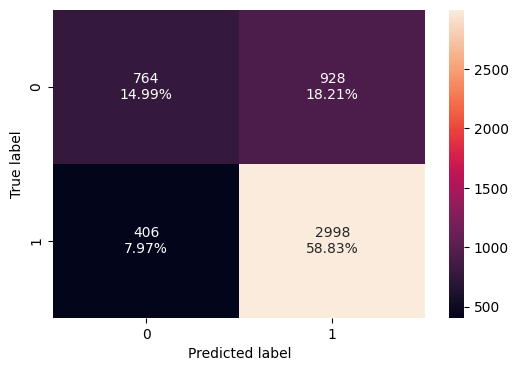

Xgboost: 


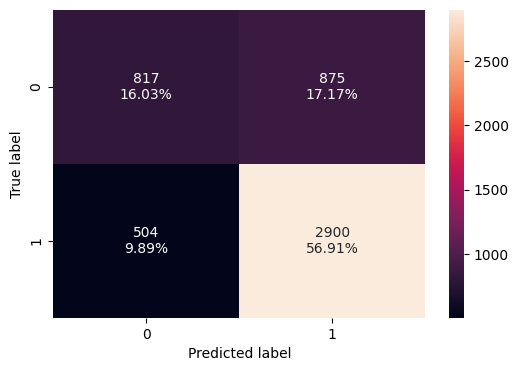

dtree: 


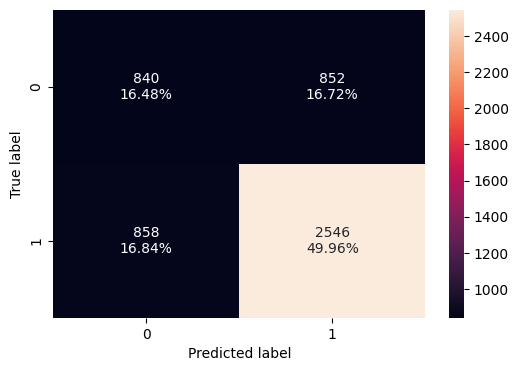

In [177]:
#Checking performance on the validation set
#creating the confusion matrix for the validation sets
for name, model in models:
    model.fit(X_train, y_train)
    print("{}: ".format(name))
    confusion_matrix_sklearn(model,X_val,y_val)
    plt.show()
    

# **Model Building - OVERSAMPLED DATA**

In [179]:
print("Before Oversampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before Oversampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

sm = SMOTE(
    sampling_strategy=1, k_neighbors=5, random_state=1
)  # Synthetic Minority Over Sampling Technique
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)


print("After Oversampling, counts of label 'Yes': {}".format(sum(y_train_over == 1)))
print("After Oversampling, counts of label 'No': {} \n".format(sum(y_train_over == 0)))


print("After Oversampling, the shape of train_X: {}".format(X_train_over.shape))
print("After Oversampling, the shape of train_y: {} \n".format(y_train_over.shape))

Before Oversampling, counts of label 'Yes': 10210
Before Oversampling, counts of label 'No': 5078 

After Oversampling, counts of label 'Yes': 10210
After Oversampling, counts of label 'No': 10210 

After Oversampling, the shape of train_X: (20420, 21)
After Oversampling, the shape of train_y: (20420,) 



In [181]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1, class_weight='balanced')))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))
models.append(("dtree", DecisionTreeClassifier(random_state=1, class_weight='balanced')))


names = []  # Empty list to store name of the models
results_over = []

print("\n" "Cross-Validation Performance on oversampled training set:" "\n")
for name, model in models:
    scoring = "f1"
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result_over = cross_val_score(
        estimator=model, X=X_train_over, y=y_train_over, scoring=scoring, cv=kfold
    )
    results_over.append(cv_result_over)
    names.append(name)
    print("{}: {}".format(name, cv_result_over.mean() * 100))

print("\n" "Performance of the models on oversampled train and validation sets:" "\n")
for name, model in models:
    model.fit(X_train_over, y_train_over)
    score_acc_over = accuracy_score(y_train_over, model.predict(X_train_over))
    score_pre_over = precision_score(y_train_over, model.predict(X_train_over))
    score_rec_over = recall_score(y_train_over, model.predict(X_train_over))
    score_f1_over = f1_score(y_train_over, model.predict(X_train_over))
    
    score_val_acc_over = accuracy_score(y_val, model.predict(X_val))
    score_val_pre_over = precision_score(y_val, model.predict(X_val))
    score_val_rec_over = recall_score(y_val, model.predict(X_val))
    score_val_f1_over = f1_score(y_val, model.predict(X_val))
    
    print("{}: ".format(name))
   
    df_perf_over =[{"": 'Train Perf',"Accuracy": score_acc_over, "Recall": score_rec_over, "Precision": score_pre_over, "F1": score_f1_over}, 
                {"": 'Valset Perf', "Accuracy": score_val_acc_over, "Recall": score_val_rec_over, "Precision": score_val_pre_over, "F1": score_val_f1_over}]
    df_over = pd.DataFrame(df_perf_over)
    print(df_over)
    print("\n")


Cross-Validation Performance on oversampled training set:

Bagging: 75.55503868710014
Random forest: 79.3178171785329
GBM: 80.28773059477831
Adaboost: 79.79150439247013
Xgboost: 79.93652879332656
dtree: 72.66966032310629

Performance of the models on oversampled train and validation sets:

Bagging: 
                Accuracy  Recall  Precision    F1
0   Train Perf     0.988   0.983      0.993 0.988
1  Valset Perf     0.693   0.753      0.780 0.767


Random forest: 
                Accuracy  Recall  Precision    F1
0   Train Perf     1.000   1.000      1.000 1.000
1  Valset Perf     0.723   0.813      0.781 0.797


GBM: 
                Accuracy  Recall  Precision    F1
0   Train Perf     0.796   0.854      0.766 0.807
1  Valset Perf     0.747   0.846      0.790 0.817


Adaboost: 
                Accuracy  Recall  Precision    F1
0   Train Perf     0.780   0.884      0.731 0.801
1  Valset Perf     0.740   0.882      0.765 0.820


Xgboost: 
                Accuracy  Recall  Precision    

In [183]:
print("\nOversampled Training and Validation Performance Difference in F1_score:\n")

for name, model in models:
    model.fit(X_train_over, y_train_over)
    scores_train_over = f1_score(y_train_over, model.predict(X_train_over))
    scores_val_over = f1_score(y_val, model.predict(X_val))
    difference1_over = scores_train_over - scores_val_over
    print("{}: Training Score: {:.4f}, Validation Score: {:.4f}, Difference: {:.4f}".format(name, scores_train_over, scores_val_over, difference1_over)) 


Oversampled Training and Validation Performance Difference in F1_score:

Bagging: Training Score: 0.9875, Validation Score: 0.7665, Difference: 0.2210
Random forest: Training Score: 1.0000, Validation Score: 0.7965, Difference: 0.2034
GBM: Training Score: 0.8072, Validation Score: 0.8173, Difference: -0.0101
Adaboost: Training Score: 0.8005, Validation Score: 0.8195, Difference: -0.0190
Xgboost: Training Score: 0.8709, Validation Score: 0.8129, Difference: 0.0579
dtree: Training Score: 1.0000, Validation Score: 0.7320, Difference: 0.2680


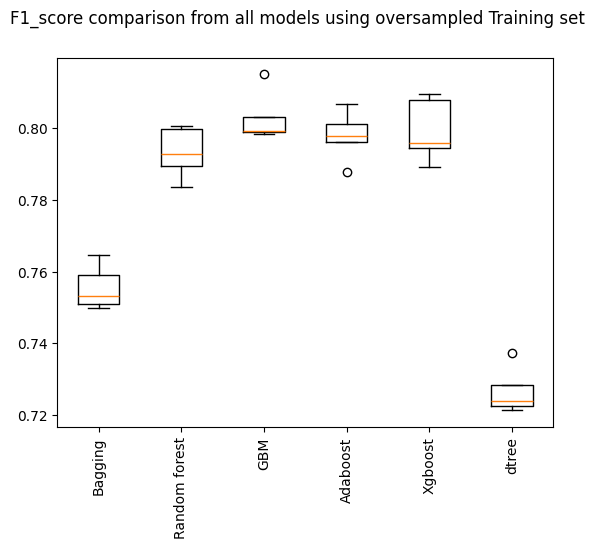

In [184]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure()

fig.suptitle("F1_score comparison from all models using oversampled Training set")
ax = fig.add_subplot(111)

plt.boxplot(results_over)
ax.set_xticklabels(names)
plt.xticks(rotation=90)

plt.show()

**Observation**

- We can see that the Gradient Boosting mechanism is giving the highest cross-validated f1_score of 80.28 followed by XGBoost (79.93)
- The boxplot shows that the performance of GradientBoost, XGBoost and Adaboost is consistent and their performance on the validation set is also good with a very low difference of -0.0101, 0.0579 and -0.0190 respectively.
- From the F1_scores on the validation test AdaBoost gives the highest F1_score and the lowest difference of F1_score between the train and validation, thus tops all the models in performance while training using an oversampled training set

Bagging: 


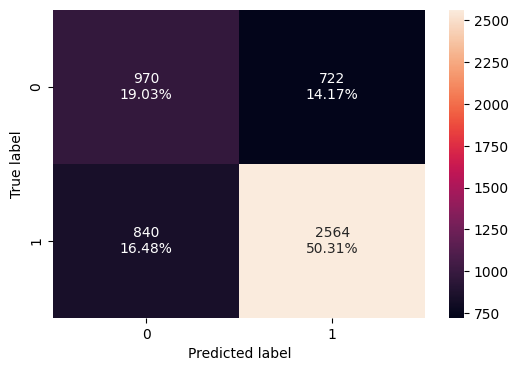

Random forest: 


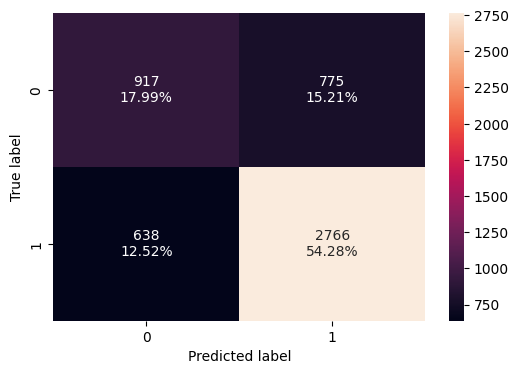

GBM: 


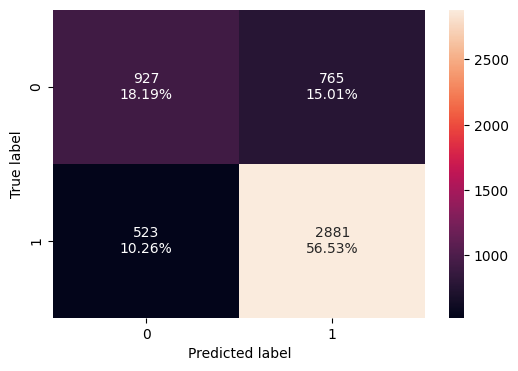

Adaboost: 


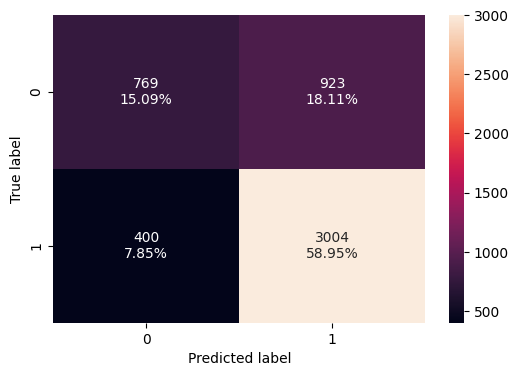

Xgboost: 


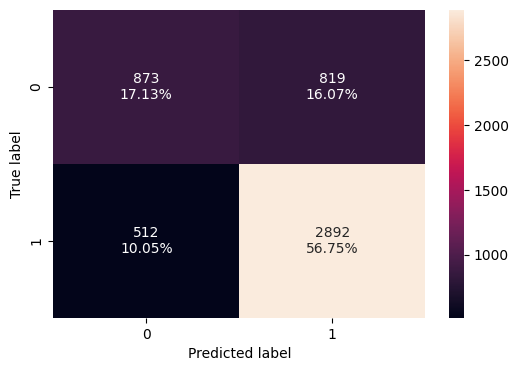

dtree: 


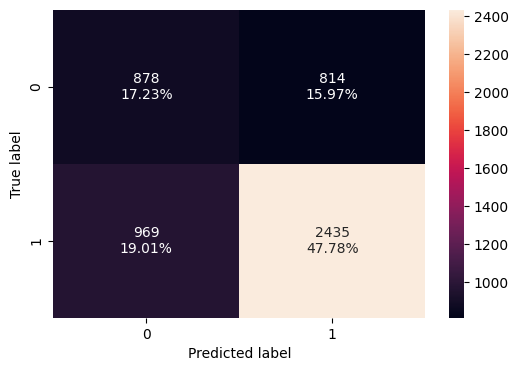

In [188]:
#Checking performance on the validation set using oversampled training set
#creating the confusion matrix for the validation sets
for name, model in models:
    model.fit(X_train_over, y_train_over)
    print("{}: ".format(name))
    confusion_matrix_sklearn(model,X_val,y_val)
    plt.show()

# **Model Building - UNDERSAMPLED DATA**

In [191]:
rus = RandomUnderSampler(random_state=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

In [193]:
print("Before Under Sampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before Under Sampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

print("After Under Sampling, counts of label 'Yes': {}".format(sum(y_train_un == 1)))
print("After Under Sampling, counts of label 'No': {} \n".format(sum(y_train_un == 0)))

print("After Under Sampling, the shape of train_X: {}".format(X_train_un.shape))
print("After Under Sampling, the shape of train_y: {} \n".format(y_train_un.shape))

Before Under Sampling, counts of label 'Yes': 10210
Before Under Sampling, counts of label 'No': 5078 

After Under Sampling, counts of label 'Yes': 5078
After Under Sampling, counts of label 'No': 5078 

After Under Sampling, the shape of train_X: (10156, 21)
After Under Sampling, the shape of train_y: (10156,) 



In [195]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1, class_weight='balanced')))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))
models.append(("dtree", DecisionTreeClassifier(random_state=1, class_weight='balanced')))


names = []  # Empty list to store name of the models
results_un = []

print("\n" "Cross-Validation Performance on undersampled training set:" "\n")
for name, model in models:
    scoring = "f1"
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result_un = cross_val_score(
        estimator=model, X=X_train_un, y=y_train_un, scoring=scoring, cv=kfold
    )
    results_un.append(cv_result_un)
    names.append(name)
    print("{}: {}".format(name, cv_result_un.mean() * 100))

print("\n" "Performance of the models on undersampled train and validation sets:" "\n")
for name, model in models:
    model.fit(X_train_un, y_train_un)
    score_acc_un = accuracy_score(y_train_un, model.predict(X_train_un))
    score_pre_un = precision_score(y_train_un, model.predict(X_train_un))
    score_rec_un = recall_score(y_train_un, model.predict(X_train_un))
    score_f1_un = f1_score(y_train_un, model.predict(X_train_un))
    
    score_val_acc_un = accuracy_score(y_val, model.predict(X_val))
    score_val_pre_un = precision_score(y_val, model.predict(X_val))
    score_val_rec_un = recall_score(y_val, model.predict(X_val))
    score_val_f1_un = f1_score(y_val, model.predict(X_val))
    
    print("{}: ".format(name))
   
    df_perf_un =[{"": 'Train Perf',"Accuracy": score_acc_un, "Recall": score_rec_un, "Precision": score_pre_un, "F1": score_f1_un}, 
                {"": 'Valset Perf', "Accuracy": score_val_acc_un, "Recall": score_val_rec_un, "Precision": score_val_pre_un, "F1": score_val_f1_un}]
    df_un = pd.DataFrame(df_perf_un)
    print(df_un)
    print("\n")


Cross-Validation Performance on undersampled training set:

Bagging: 63.58910991015145
Random forest: 67.70437575849454
GBM: 71.23880772066684
Adaboost: 70.71916646661187
Xgboost: 67.87320411742058
dtree: 62.06808909417422

Performance of the models on undersampled train and validation sets:

Bagging: 
                Accuracy  Recall  Precision    F1
0   Train Perf     0.981   0.969      0.992 0.980
1  Valset Perf     0.656   0.618      0.823 0.706


Random forest: 
                Accuracy  Recall  Precision    F1
0   Train Perf     1.000   1.000      1.000 1.000
1  Valset Perf     0.686   0.675      0.824 0.742


GBM: 
                Accuracy  Recall  Precision    F1
0   Train Perf     0.721   0.748      0.709 0.728
1  Valset Perf     0.720   0.729      0.831 0.777


Adaboost: 
                Accuracy  Recall  Precision    F1
0   Train Perf     0.695   0.716      0.688 0.702
1  Valset Perf     0.708   0.716      0.824 0.766


Xgboost: 
                Accuracy  Recall  Precision 

In [197]:
print("\nUndersampled Training and Validation Performance Difference in F1_score:\n")

for name, model in models:
    model.fit(X_train_un, y_train_un)
    scores_train_un = f1_score(y_train_un, model.predict(X_train_un))
    scores_val_un = f1_score(y_val, model.predict(X_val))
    difference1_un = scores_train_un - scores_val_un
    print("{}: Training Score: {:.4f}, Validation Score: {:.4f}, Difference: {:.4f}".format(name, scores_train_un, scores_val_un, difference1_un)) 


Undersampled Training and Validation Performance Difference in F1_score:

Bagging: Training Score: 0.9804, Validation Score: 0.7057, Difference: 0.2747
Random forest: Training Score: 1.0000, Validation Score: 0.7417, Difference: 0.2583
GBM: Training Score: 0.7281, Validation Score: 0.7766, Difference: -0.0485
Adaboost: Training Score: 0.7015, Validation Score: 0.7660, Difference: -0.0645
Xgboost: Training Score: 0.8720, Validation Score: 0.7459, Difference: 0.1261
dtree: Training Score: 1.0000, Validation Score: 0.6956, Difference: 0.3044


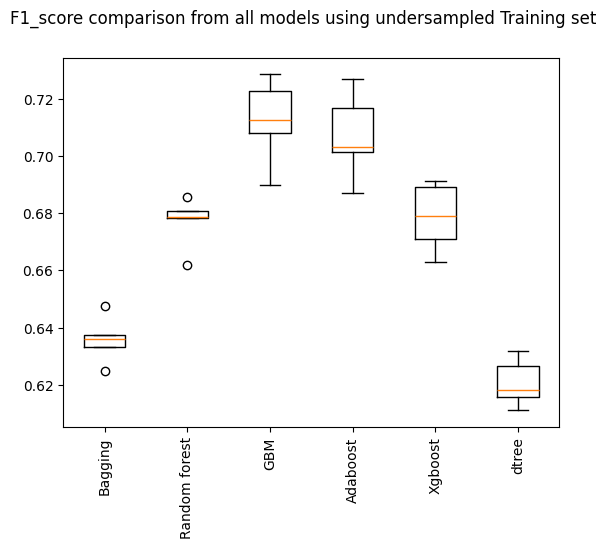

In [198]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure()

fig.suptitle("F1_score comparison from all models using undersampled Training set")
ax = fig.add_subplot(111)

plt.boxplot(results_un)
ax.set_xticklabels(names)
plt.xticks(rotation=90)

plt.show()

**Observation**

- We can see that the Gradient Boosting mechanism is giving the highest cross-validated f1_score of 71.23 followed by AdaBoost (70.719)
- The boxplot shows that the performance of GradientBoost is consistent and their performance on the validation set is also good with a low difference of -0.04. The performance of GBM is followed by AdaBoost showing a lower difference in F1_score (-.06).
- From the F1_scores on the validation test,  GBM gives the highest F1_score (0.777) and the AdaBoost gives the lowest difference of F1_score between the train and validation, thus both the models goes hand in hand exhibiting good performance while training using an undersampled training set

Bagging: 


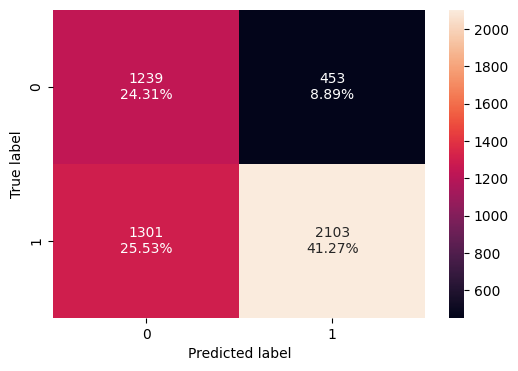

Random forest: 


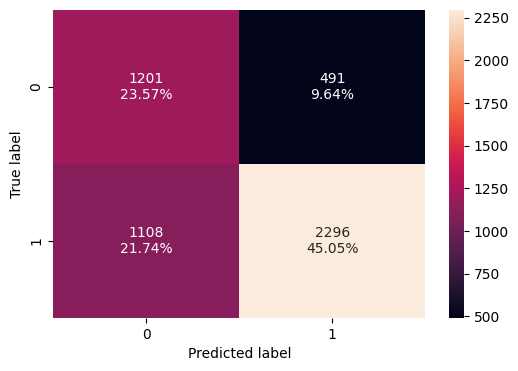

GBM: 


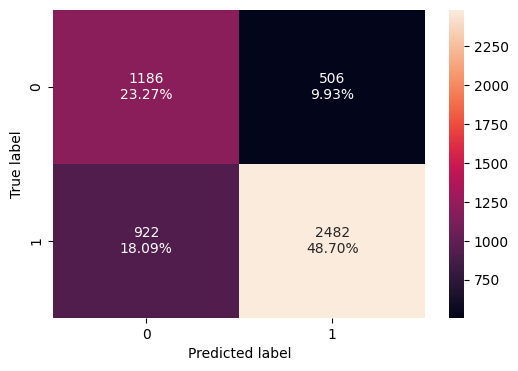

Adaboost: 


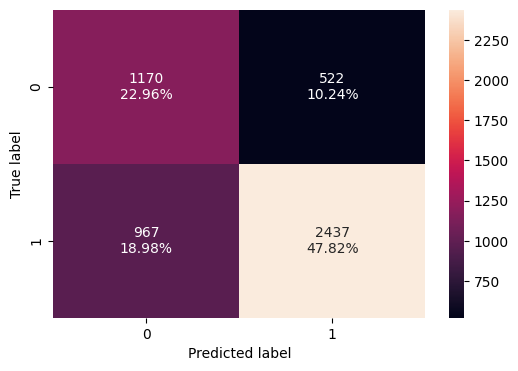

Xgboost: 


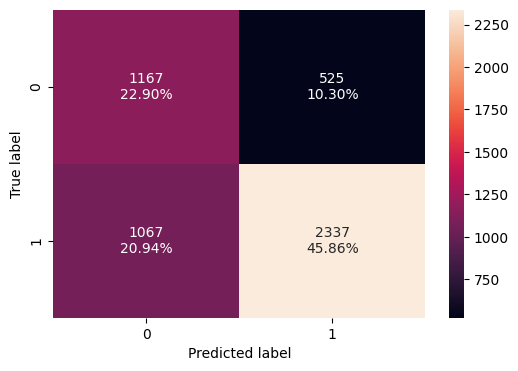

dtree: 


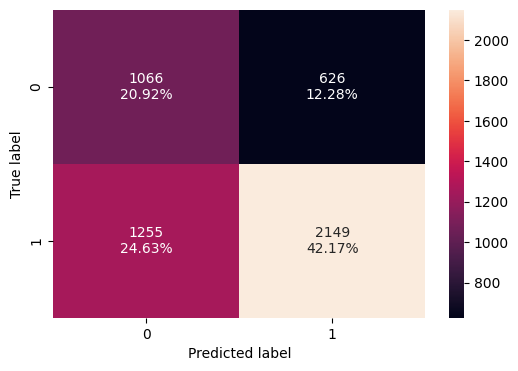

In [202]:
#Checking performance on the validation set using oversampled training set
#creating the confusion matrix for the validation sets
for name, model in models:
    model.fit(X_train_un, y_train_un)
    print("{}: ".format(name))
    confusion_matrix_sklearn(model,X_val,y_val)
    plt.show()

# **MODEL PERFORMANCE IMPROVEMENT USING HYPERPARAMETER  TUNING**

### **Reasoning**

 - The Box plot shows that the performance of AdaBoost and GBM is consitent followed by XGBoost and their performance on the validation set is also good
 - After building 18 models, and analysing its performance on the validation set it was observed that the GBM trained on an original data exhibits strong performance on both training and validation sets
 - Next to GBM, both AdaBoost and XGBoost models, trained on an oversampled dataset exhibits a consistent performance.
 - Sometimes models might overfit after oversampling, so it's better to tune the models to get a generalized performance
 - We will tune these 5 models using the same data as we trained them on before.
    1.	GBM trained on original data
    2.	AdaBoost trained on an oversampled dataset
    3.	AdaBoost trained on original dataset
    4.	GBM trained on oversampled dataset
    5.	XGBoost trained on an oversampled dataset



## **Hyperparameter Tuning**

### **Tuning GradientBoosting model with Original data**

In [209]:
%%time

#defining model
Model = GradientBoostingClassifier(random_state=1)

#Parameter grid to pass in RandomSearchCV
param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "subsample":[0.7,0.9],
    "max_features":[0.5,0.7,1],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1, n_jobs = -1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train) ## Complete the code to fit the model on original data


print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.7, 'n_estimators': 50, 'max_features': 0.7, 'learning_rate': 0.05, 'init': AdaBoostClassifier(random_state=1)} with CV score=0.8253298966061878:
CPU times: total: 2.48 s
Wall time: 19.5 s


In [211]:
tuned_gbm1 = GradientBoostingClassifier(
    random_state=1,
    subsample=0.7,
    n_estimators=50,
    max_features=0.7,
    learning_rate=0.05,
    init=AdaBoostClassifier(random_state=1),
)
tuned_gbm1.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           learning_rate=0.05, max_features=0.7,
                           n_estimators=50, random_state=1, subsample=0.7)

In [213]:
# Checking model's performance on training set
gbm1_train = model_performance_classification_sklearn(
    tuned_gbm1, X_train, y_train
)
gbm1_train

,Accuracy,Recall,Precision,F1
0,0.750,0.899,0.767,0.828


In [215]:
# Checking model's performance on validation set
gbm1_val = model_performance_classification_sklearn(tuned_gbm1, X_val, y_val)
gbm1_val

,Accuracy,Recall,Precision,F1
0,0.749,0.897,0.767,0.827


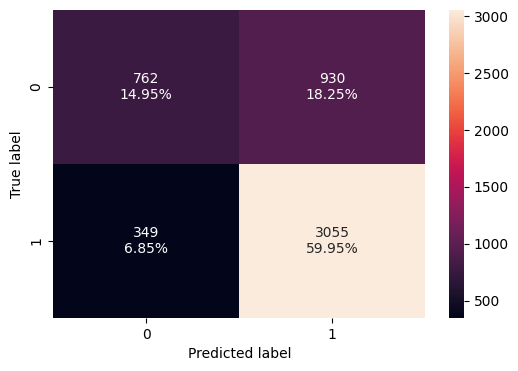

In [217]:
# creating confusion matrix
confusion_matrix_sklearn(tuned_gbm1, X_val, y_val)

#### Feature Importance of Tuned GradientBoosting model

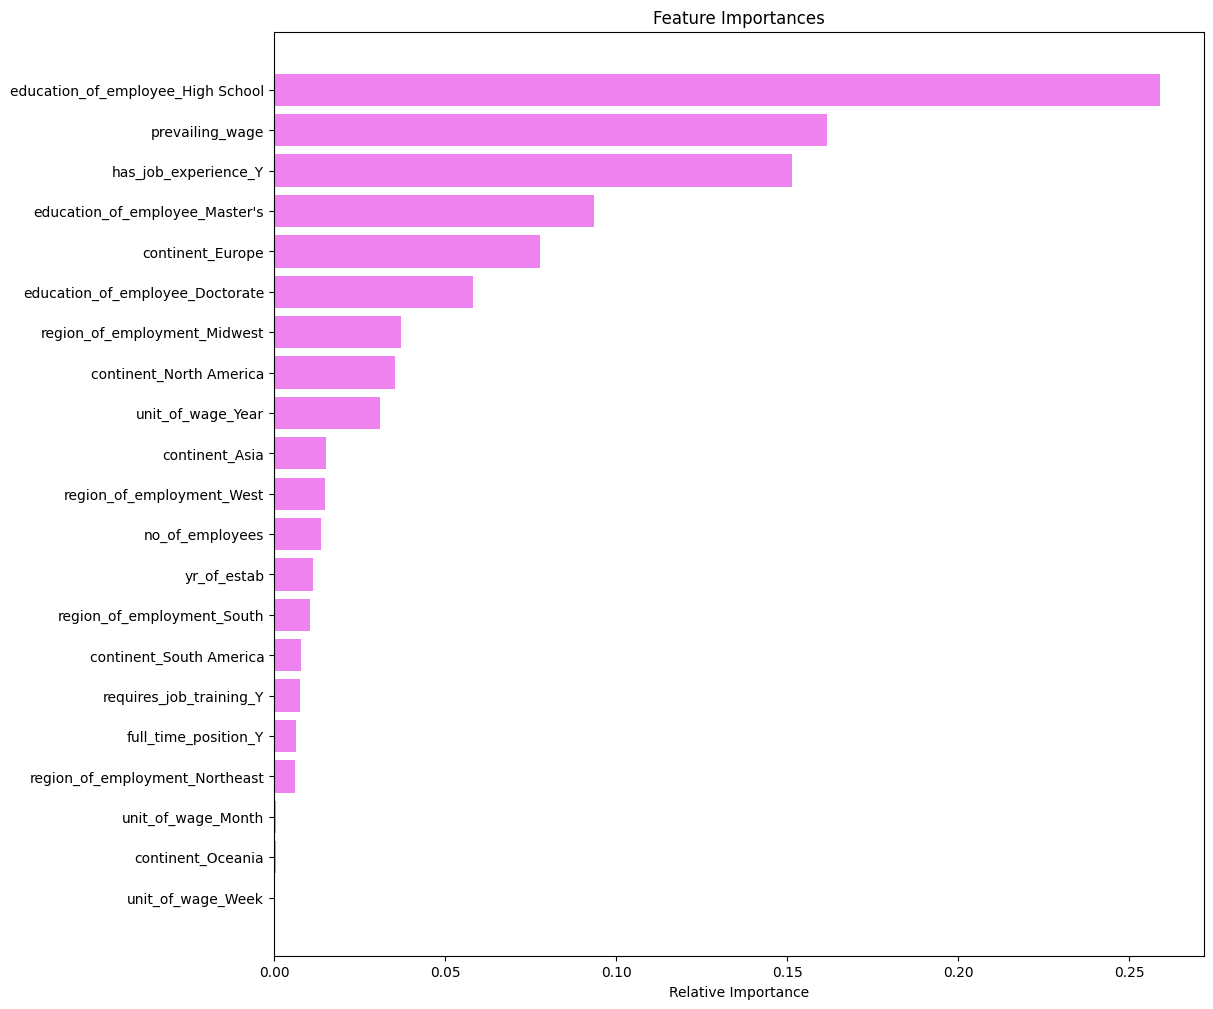

In [220]:
feature_names = X_train.columns
importances = tuned_gbm1.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

**Observations:**
* The performance of the GBM model gives approximately the same F1 score before and after hyperparameter tuning.
* In terms of precision and accuracy, the default model has a slightly better score. recall is however better in this tuned model.
* The top 5 important features here are eduction of employee (high school and masters), has job experience (y),prevailing wage and continent_Europe.
* The tuned model predicts the "True Positives" with approximately 60% accuracy, which is better than the default model

### **Tuning AdaBoost model with oversampled dataset**

In [224]:
%%time

# defining model
Model = AdaBoostClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": np.arange(10, 40, 10),
    "learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "estimator": [
        DecisionTreeClassifier(max_depth=1, random_state=1),
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1, n_jobs=-1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over, y_train_over)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))


Best parameters are {'n_estimators': 30, 'learning_rate': 1, 'estimator': DecisionTreeClassifier(max_depth=3, random_state=1)} with CV score=0.7897563703598921:
CPU times: total: 1.61 s
Wall time: 8.75 s


In [226]:
tuned_adb = AdaBoostClassifier(
    random_state=1,
    n_estimators=30,
    learning_rate=1,
    estimator=DecisionTreeClassifier(max_depth=3, random_state=1),
)
tuned_adb.fit(X_train_over, y_train_over)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=3,
                                                    random_state=1),
                   learning_rate=1, n_estimators=30, random_state=1)

In [227]:
# Checking model's performance on training set
adb_train = model_performance_classification_sklearn(
    tuned_adb, X_train_over, y_train_over
)
adb_train

,Accuracy,Recall,Precision,F1
0,0.786,0.854,0.752,0.800


In [230]:
# Checking model's performance on validation set
adb_val = model_performance_classification_sklearn(tuned_adb, X_val, y_val)
adb_val

,Accuracy,Recall,Precision,F1
0,0.742,0.848,0.783,0.814


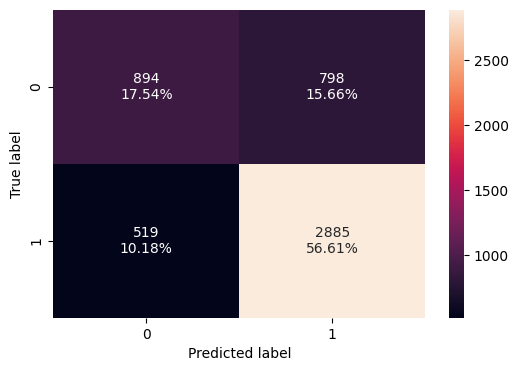

In [232]:
# creating confusion matrix
confusion_matrix_sklearn(tuned_adb, X_val, y_val)

#### Feature Importance of Tuned AdaBoost model with oversampled data

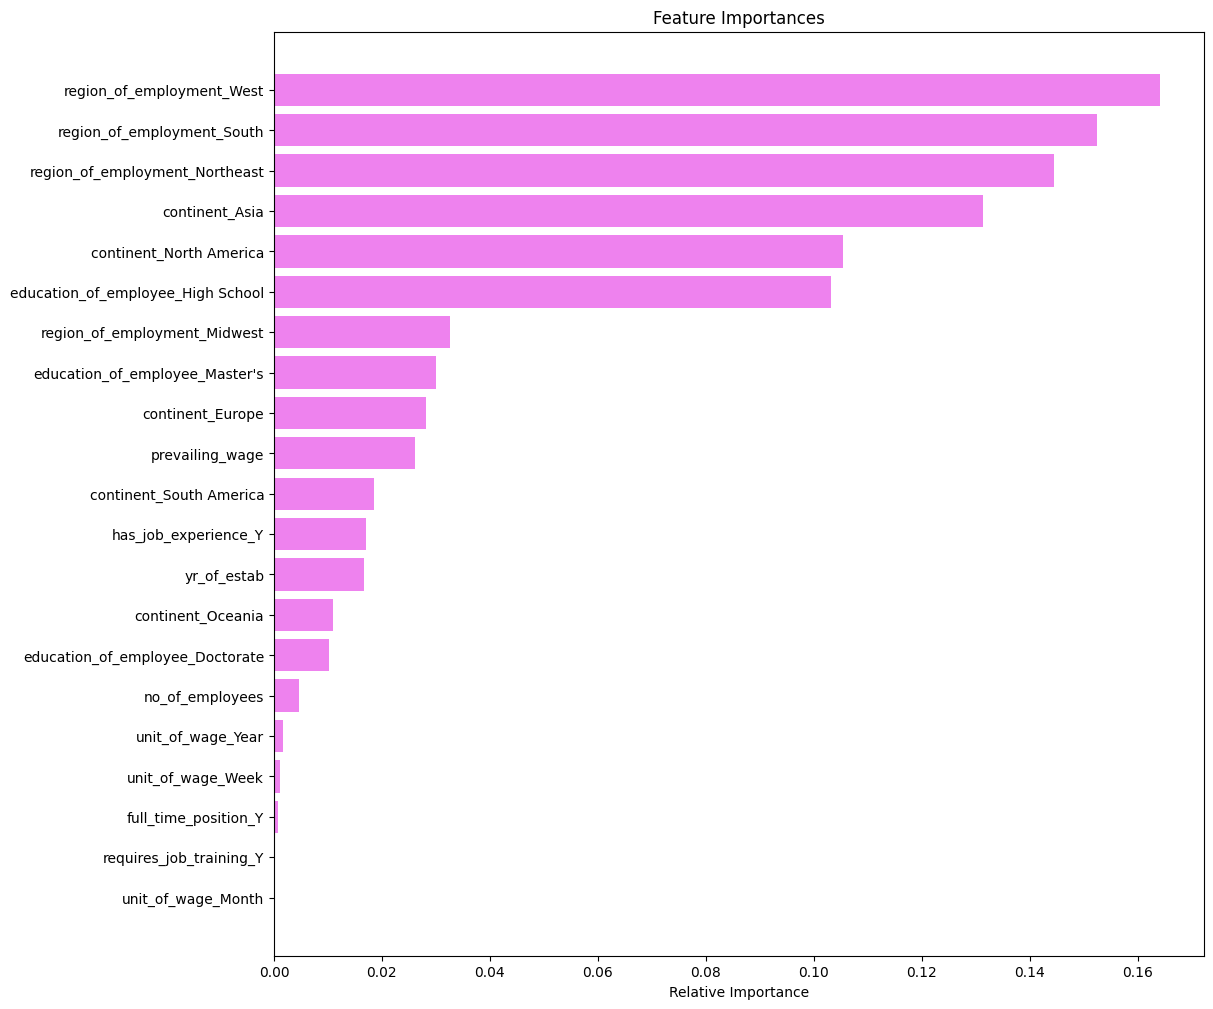

In [235]:
feature_names = X_train_over.columns
importances = tuned_adb.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

**Observations:**
* The performance of the AdaBoost model gives a slightly lower F1 score after hyperparameter tuning the model which was trained with oversampled data.
* In terms of precision and accuracy, the tuned model with oversampled data has a slightly better score. However recall has a  better score in the default model trained with oversampled data.
* The top 5 important features here are eduction of employee (high school and masters), has job experience (y),prevailing wage and no. of employees.
* The "True Positive" prediction rate was better on the default model with oversampled data than the tuned model.

### **Tuning AdaBoost model with Original dataset**

In [239]:
%%time

# defining model
Model = AdaBoostClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": np.arange(10, 40, 10),
    "learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "estimator": [
        DecisionTreeClassifier(max_depth=1, random_state=1),
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1, n_jobs=-1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train, y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))


Best parameters are {'n_estimators': 20, 'learning_rate': 0.2, 'estimator': DecisionTreeClassifier(max_depth=3, random_state=1)} with CV score=0.8223322912021356:
CPU times: total: 1.61 s
Wall time: 6.21 s


In [240]:
tuned_adb1 = AdaBoostClassifier(
    random_state=1,
    n_estimators=20,
    learning_rate=0.2,
    estimator=DecisionTreeClassifier(max_depth=3, random_state=1),
)
tuned_adb1.fit(X_train, y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=3,
                                                    random_state=1),
                   learning_rate=0.2, n_estimators=20, random_state=1)

In [243]:
# Checking model's performance on training set
adb_train1 = model_performance_classification_sklearn(
    tuned_adb1, X_train, y_train
)
adb_train1

,Accuracy,Recall,Precision,F1
0,0.747,0.882,0.772,0.823


In [245]:
# Checking model's performance on validation set
adb_val1 = model_performance_classification_sklearn(tuned_adb1, X_val, y_val)
adb_val1

,Accuracy,Recall,Precision,F1
0,0.742,0.871,0.772,0.818


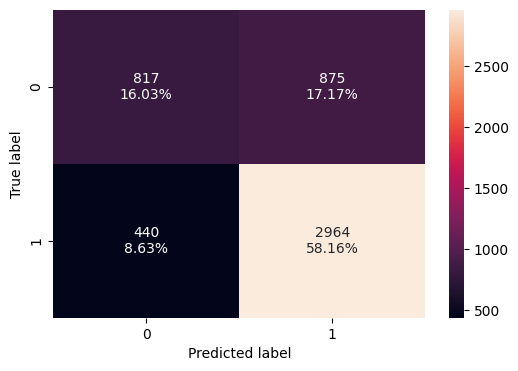

In [247]:
# creating confusion matrix
confusion_matrix_sklearn(tuned_adb1, X_val, y_val)

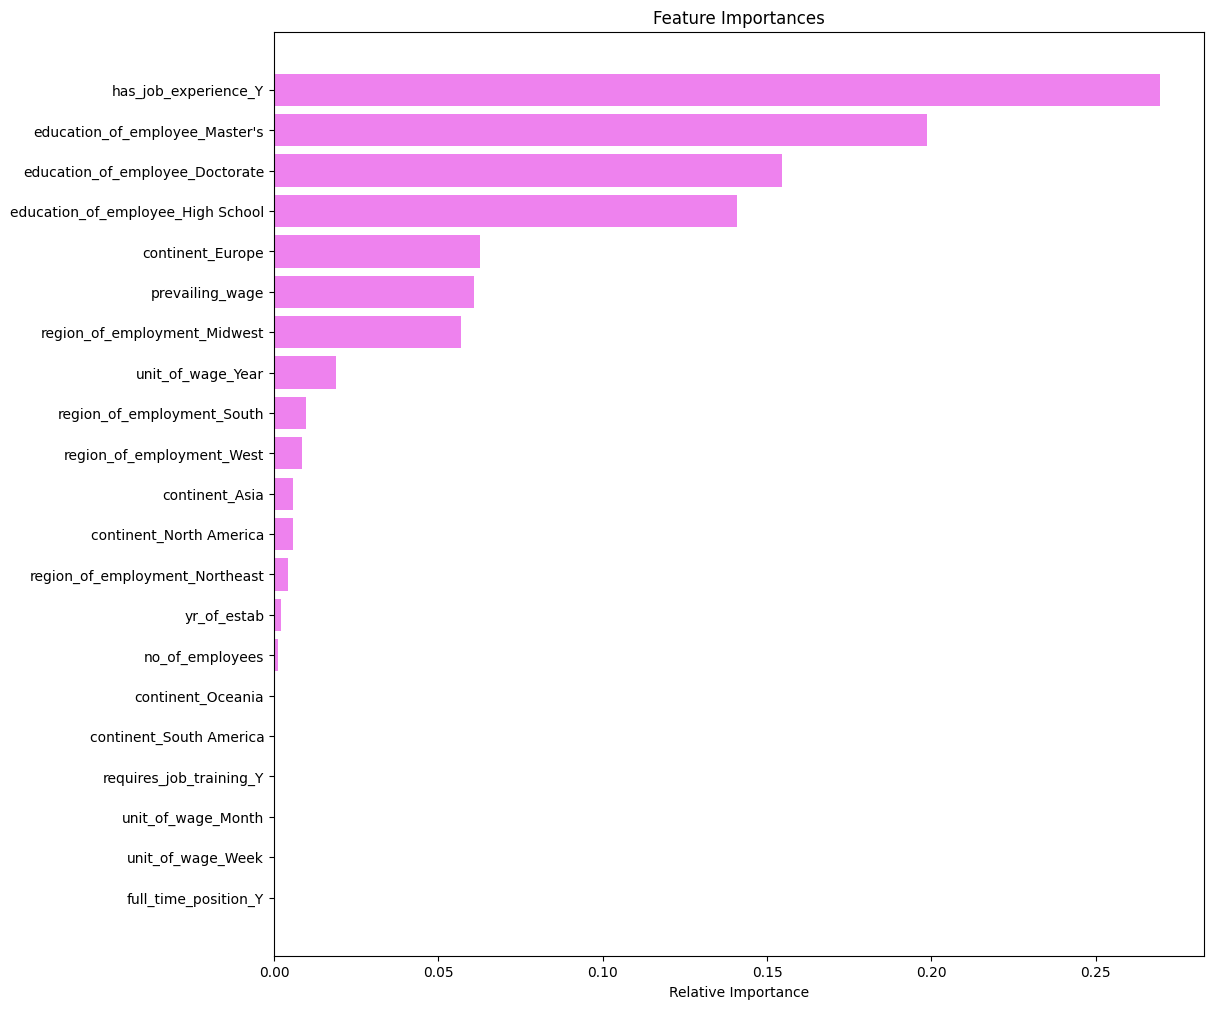

In [251]:
feature_names = X_train.columns
importances = tuned_adb1.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

**Observations:**
* The performance of the AdaBoost model gives approximately the same F1 score before and after hyperparameter tuning.
* In terms of precision and accuracy, the tuned model has a slightly better score. recall is however better in the default model.
* The top 5 important features here are eduction of employee (high school, Doctorate and masters), has job experience (y) and continent_Europe.
* The tuned model predicts the "True Positives" with approximately 58.16% accuracy, which is slightly lower than the default model which predicts with 58.83% accuracy.

### **Tuning GradientBoost model trained with oversampled dataset**

In [255]:
%%time

#defining model
Model = GradientBoostingClassifier(random_state=1)

#Parameter grid to pass in RandomSearchCV
param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(125,175,25),
    "learning_rate": [0.01, 0.2, 0.05, 1],
    "subsample":[0.8,0.9,1],
    "max_features":[0.5,0.7,1],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1, n_jobs = -1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over, y_train_over)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.9, 'n_estimators': 150, 'max_features': 0.7, 'learning_rate': 0.2, 'init': AdaBoostClassifier(random_state=1)} with CV score=0.8022275753211767:
CPU times: total: 4.44 s
Wall time: 48.3 s


In [257]:
tuned_gbm2 = GradientBoostingClassifier(
    random_state=1,
    subsample=0.9,
    n_estimators=150,
    max_features=0.7,
    learning_rate=0.2,
    init=AdaBoostClassifier(random_state=1),
)
tuned_gbm2.fit(X_train_over, y_train_over)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           learning_rate=0.2, max_features=0.7,
                           n_estimators=150, random_state=1, subsample=0.9)

In [258]:
# Checking model's performance on training set
gbm2_train = model_performance_classification_sklearn(
    tuned_gbm2, X_train_over, y_train_over
)
gbm2_train

,Accuracy,Recall,Precision,F1
0,0.808,0.866,0.776,0.818


In [261]:
# Checking model's performance on validation set
gbm2_val = model_performance_classification_sklearn(tuned_gbm2, X_val, y_val)
gbm2_val

,Accuracy,Recall,Precision,F1
0,0.746,0.851,0.786,0.818


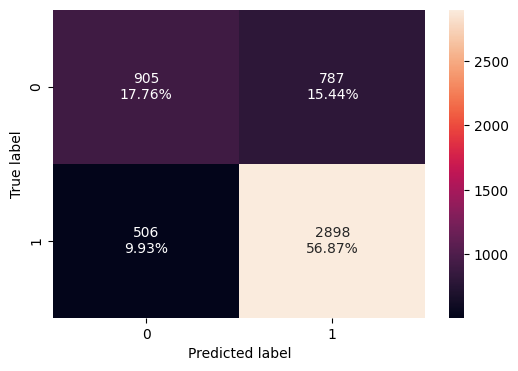

In [263]:
# creating confusion matrix
confusion_matrix_sklearn(tuned_gbm2, X_val, y_val)

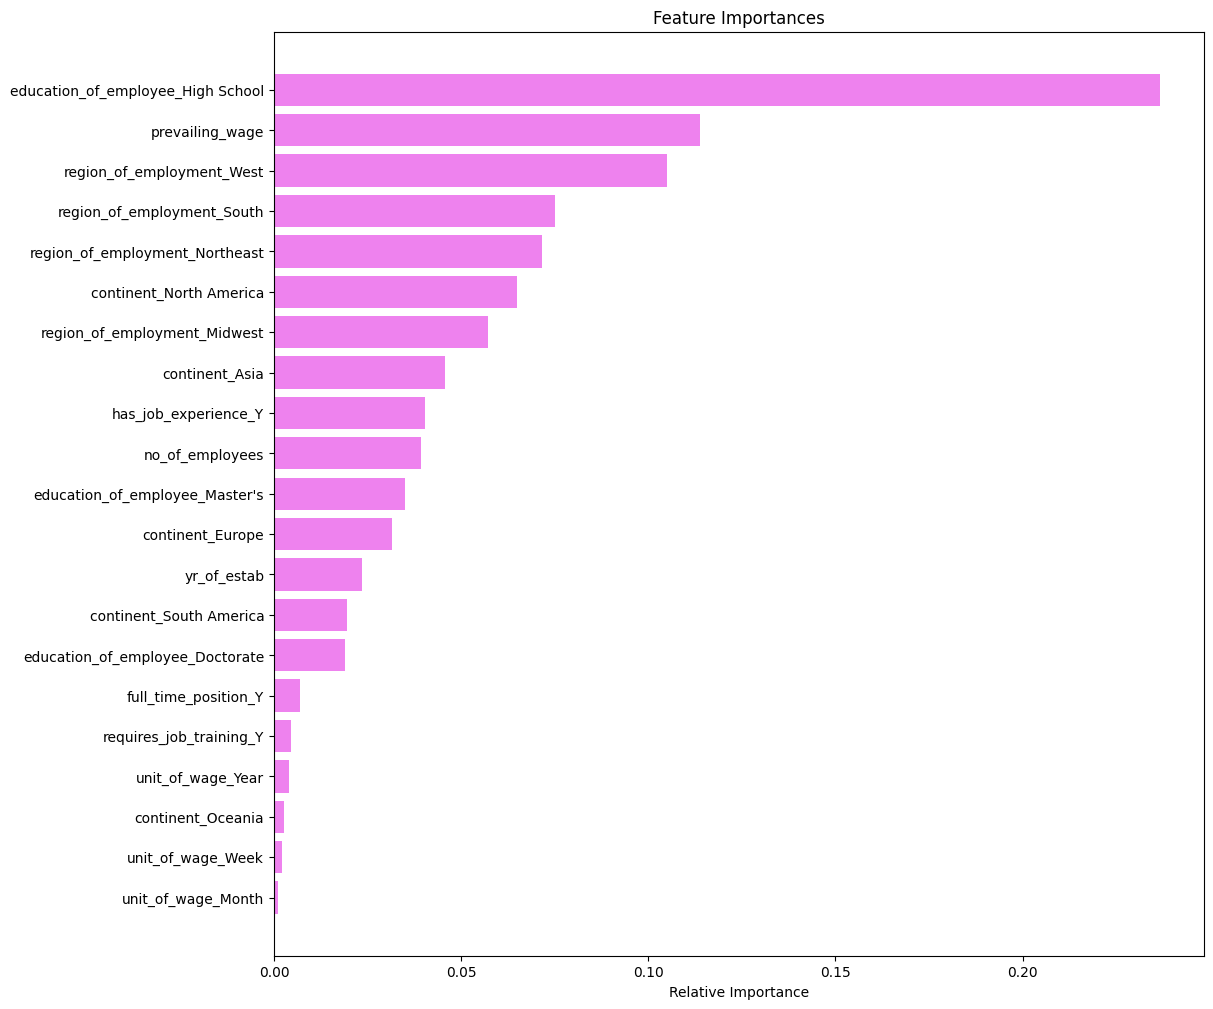

In [265]:
feature_names = X_train_over.columns
importances = tuned_gbm2.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

**Observations:**
* The performance of the GMB model with oversampled data gives approximately the same F1 score and accuracy before and after hyperparameter tuning.
* In terms of precision, the tuned model has a slightly lower score. Recall is however better in the tuned model.
* The top 5 important features here are eduction of employee (high school)), region of employment (West, South, Northeast) and prevailing wage.
* The tuned model predicts the "True Positives" with approximately 56.87% accuracy, which is slightly better than the default model which predicts with 56.53% accuracy.

### **Tuning XGBoost trained on an oversampled dataset**

In [269]:
%%time

# defining model
Model = XGBClassifier(random_state=1,eval_metric='logloss')

#Parameter grid to pass in RandomSearchCV
param_grid={'n_estimators':np.arange(50,110,25),
            'scale_pos_weight':[1,2,5],
            'learning_rate':[0.01,0.1,0.05],
            'gamma':[1,3],
            'subsample':[0.7,0.9]
           }
from sklearn import metrics

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over,y_train_over) ## Complete the code to fit the model on original data

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.9, 'scale_pos_weight': 2, 'n_estimators': 100, 'learning_rate': 0.1, 'gamma': 1} with CV score=0.8141464166173762:
CPU times: total: 4.31 s
Wall time: 8.59 s


In [271]:
tuned_xgb = XGBClassifier(
    random_state=1,
    eval_metric="logloss",
    subsample=0.9,
    scale_pos_weight=2,
    n_estimators=100,
    learning_rate=0.1,
    gamma=1,
)## Complete the code with the best parameters obtained from tuning

tuned_xgb.fit(X_train_over, y_train_over)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=1,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, ...)

In [273]:
# Checking model's performance on training set
xgb_train = model_performance_classification_sklearn(tuned_xgb, X_train_over, y_train_over) 
xgb_train

,Accuracy,Recall,Precision,F1
0,0.801,0.961,0.728,0.828


In [275]:
# Calculating different metrics on validation set
xgb_val = model_performance_classification_sklearn(tuned_xgb, X_val, y_val)
xgb_val

,Accuracy,Recall,Precision,F1
0,0.729,0.933,0.734,0.821


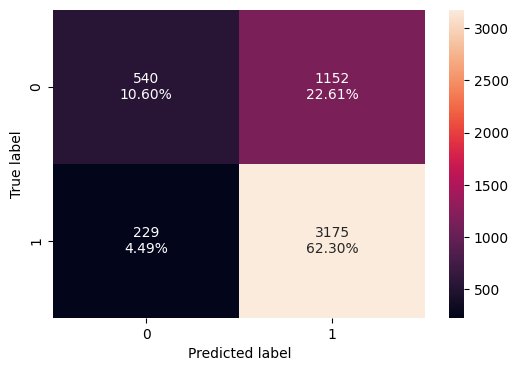

In [277]:
# creating confusion matrix
confusion_matrix_sklearn(tuned_xgb, X_val, y_val)

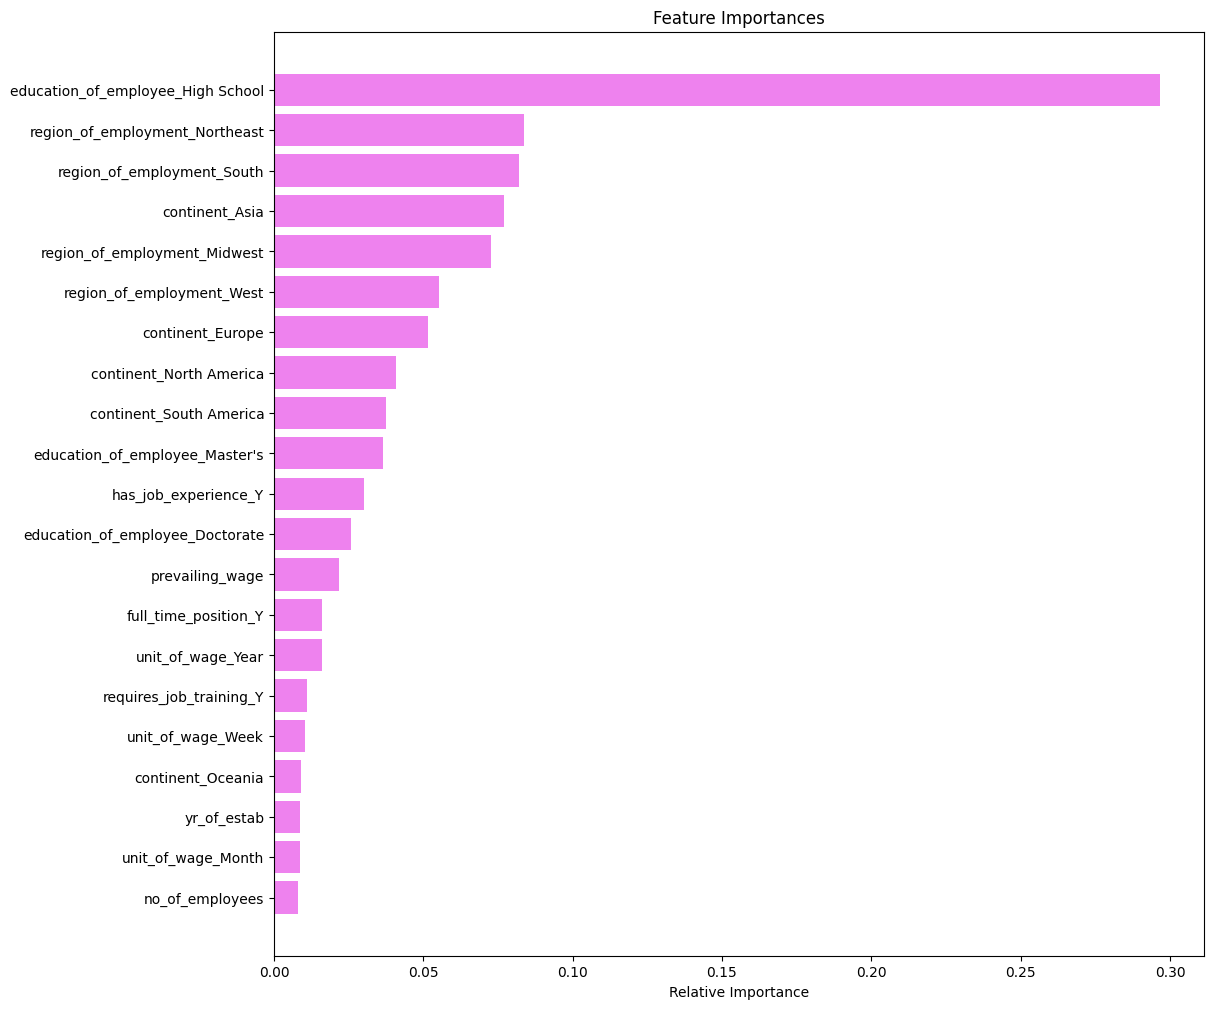

In [279]:
feature_names = X_train_over.columns
importances = tuned_xgb.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

**Observations:**
* The performance of the XGB model with oversampled data gives higher F1 score and Recall after hyperparameter tuning.
* In terms of precision and accuracy, the tuned model has a slightly lower score compared to the untuned model with oversampled data
* The top 5 important features here are eduction of employee (high school)), region of employment (South, Northeast and Midwest), continent Asia. 
* The tuned model predicts the "True Positives" with approximately 62.30% accuracy thus giving the best of all untuned and tuned models.

# **Model Performance Comparison and Final Model Selection**

In [283]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        gbm1_train.T,
        gbm2_train.T,        
        adb_train1.T,
        adb_train.T,       
        xgb_train.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "GBM with original data",
    "GBM with Oversampled data",
    "AdaBoost with original data",
    "AdaBoost with Oversampled data",     
    "XGB with Oversampled data",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,GBM with original data,GBM with Oversampled data,AdaBoost with original data,AdaBoost with Oversampled data,XGB with Oversampled data
Accuracy,0.750,0.808,0.747,0.786,0.801
Recall,0.899,0.866,0.882,0.854,0.961
Precision,0.767,0.776,0.772,0.752,0.728
F1,0.828,0.818,0.823,0.800,0.828


In [285]:
# training performance comparison

models_val_comp_df = pd.concat(
    [
        gbm1_val.T,
        gbm2_val.T,        
        adb_val.T,
        adb_val.T,       
        xgb_val.T,
    ],
    axis=1,
)
models_val_comp_df.columns = [
    "GBM with original data",
    "GBM with Oversampled data",
    "AdaBoost with original data",
    "AdaBoost with Oversampled data",     
    "XGB with Oversampled data",
]
print("Validation performance comparison:")
models_val_comp_df

Validation performance comparison:


,GBM with original data,GBM with Oversampled data,AdaBoost with original data,AdaBoost with Oversampled data,XGB with Oversampled data
Accuracy,0.749,0.746,0.742,0.742,0.729
Recall,0.897,0.851,0.848,0.848,0.933
Precision,0.767,0.786,0.783,0.783,0.734
F1,0.827,0.818,0.814,0.814,0.821


**Observation**
* It is observed that the Tuned GBM with original data gives the best F1_score of all the tuned models and it shows a consistent performance on the validation set as well. Hence it is selected as the best final model to be applied on the test set


### **Final Model Selection**

* It is observed that the Gradient Boosting model trained on the original data is efficient in predicting the true positives with the maximum F1_score of 0.827
* The XGBoost model trained on the oversampled data also shows a very good recall with a recall score of 0.933, thus minimizing the false negatives efficiently. This model also shows a consistent performance.
* But the tuned Gradient Boosting model maximises the “True Positives” and minimizes the “False Positives” efficiently with an Accuracy score of 0.749 and Precision score of 0.769 respectively. Hence the **`Tuned Gradient Boosting model trained with original data`** is finalized to be the best model, that can be applied on the test set.


In [287]:
# Let's check the performance on test set -Original data
gbm_test = model_performance_classification_sklearn(tuned_gbm1, X_test, y_test)
gbm_test

,Accuracy,Recall,Precision,F1
0,0.737,0.892,0.758,0.819


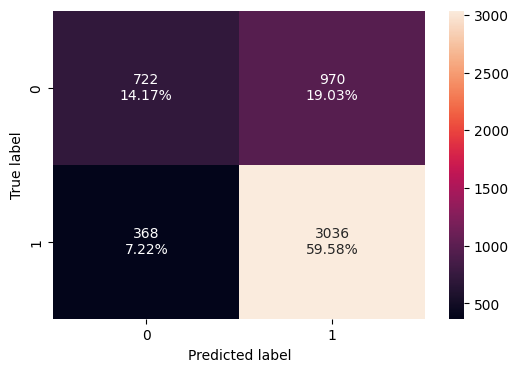

In [291]:
# creating confusion matrix for GBM with original data
confusion_matrix_sklearn(tuned_gbm1, X_test, y_test)

#### **The tuned model predicts the "True Positives" with approximately 60% accuracy on the test data**

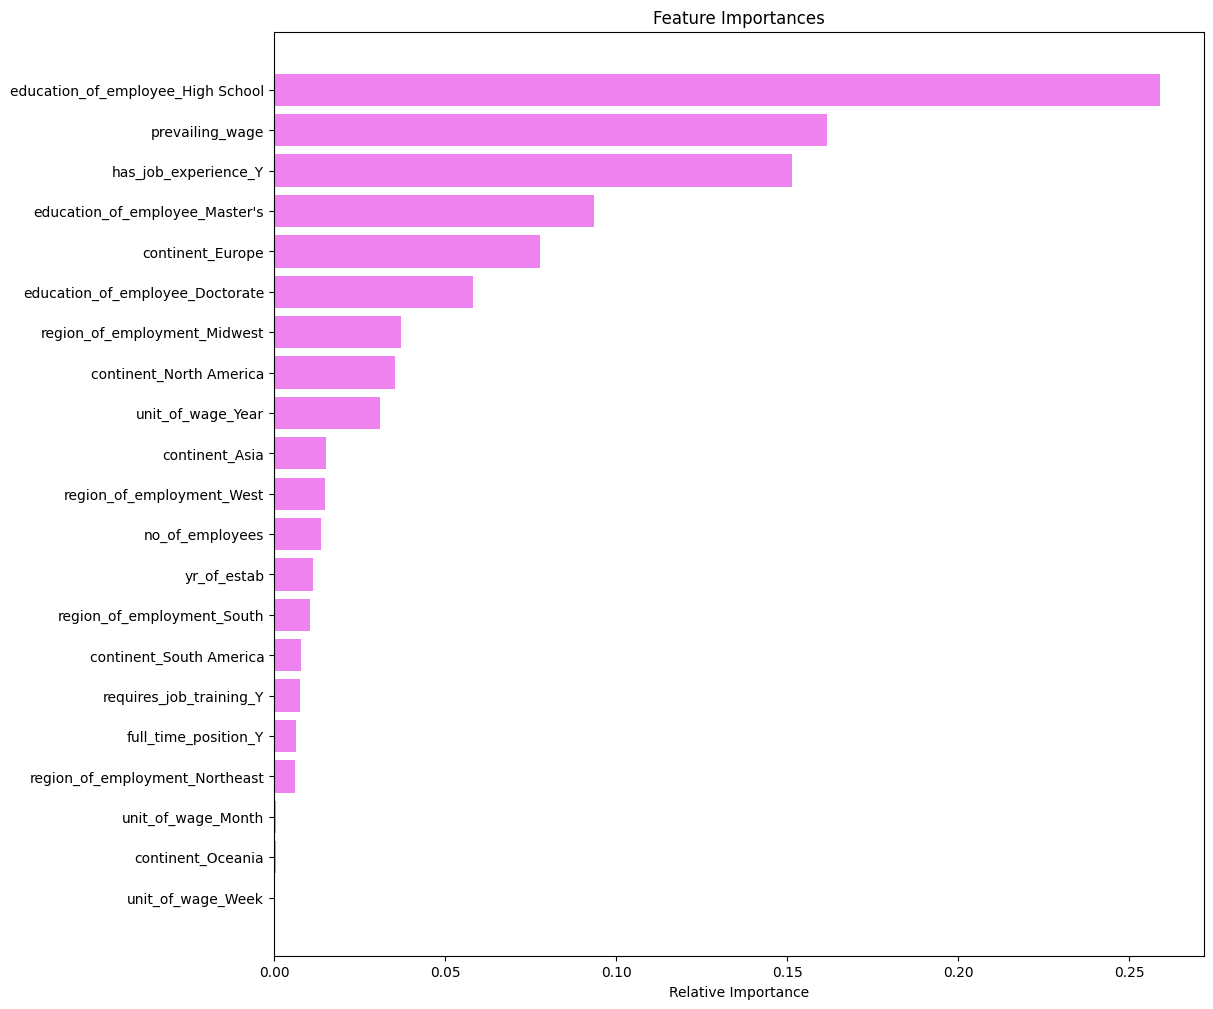

In [303]:
feature_names = X_train.columns
importances = tuned_gbm1.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

#### **It is observed that the education of the employee (High school), prevailing wage and previous experience (Y) are the most important features that are required to make predictions**


# **ACTIONABLE INSIGHTS AND RECOMMENDATIONS**

### **ANALYSIS INSIGHTS**

*	Considering the EDA and the GB Classifier model, the top 10 most important features to decide whether a visa gets certified or denied are Education of employee (High school, masters and doctorate), Has Job experience (Y), prevailing wage, Continent (Europe, North America, Asia), Unit of wage (Year), Region of employment (Midwest).
*	The most important feature with a magnitude of 0.27 is the education of employee. From the EDA, it is observed that if an employee possesses a high school as the highest qualification, then that employee is more likely to be denied than accepted. Employees with doctorate degrees and with Masters have the highest chances of getting certified, so they can be encouraged to apply for visas.
*	If an employee has job experience, they are more likely to be certified than those who do not have prior job experience. And those without experience are likely to be denied.
*	If an employee is from Europe/ North America or Asia, he/she has higher chance of getting visa certifications than any other continent.
*	Employees with a higher prevailing wage are likely to be certified, and it is noted that unit of wage is years is also an important feature. So the prevailing wage goes in line with unit of wage in years.
*	If the region of employment is Midwest, employees have higher chances of being certified than denied. Employees who apply to other regions chances of being denied.
*	With respect to the number of employees, the employer company with higher the number of employees, have good chance of getting approved.
*	Surprisingly, other factors like requirement for job training, year of establishment and full time or part time employment, do not appear to affect the denial or certification significantly


### **ACTIONABLE RECOMMENDATIONS**

*	In order to  reduce the tiresome task of screening quite a lot of visa applications, the OFLC can prioritize employees from Europe with higher degrees, who have some job experience and with the intention of getting employed in Midwest at a company with large number of employees, which uses years as the pay unit. The applications that fall under this category can be shortlisted first and then the rest can be reviewed.
*	The employing companies can also be encouraged to set a standard for job application requirements based on the important features, so that they attract candidates that have better chances of getting their visas certified.
*	The OFLC can implement a point based system for visa applicants, considering these important features as the decision criteria.  Based on these details a score card can be generated automatically as the visa application is submitted and OFLC can begin screening based on the highest points in the score card.
*	The OFLC can also organize special programs designed based on some of these important features for the respective domains for which they need immigrant workers and can make it a mandatory for US visa applicants. This also helps employers to choose talented employees who have completed or enrolled themselves in these special programmes and find suitable candidates who can contribute for both their business and country’s economy.
